In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## **Step 1: Data Collection & Acquisition**
    - Load **Dataset1** provide for the assignment.
    - Verify data credibility and relevance.
    - Check for missing records, duplicates, and data integrity issues.

In [2]:
df1 = pd.read_csv("Dataset1.csv")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [15]:
# Display dataset shape and first few rows
print("\nDataset Shape:", df1.shape)
print("\nFirst 5 Rows of the Dataset:\n", df1.head())
print("\nFeatures of the Dataset:\n", df1.columns)
df1.info()


Dataset Shape: (16321, 9)

First 5 Rows of the Dataset:
    EVENT DATE                             Program MUNICIPALITY        REGION  \
0    1/4/2017  Industrial Health & Safety Program  Scarborough  Central East   
1  12/30/2017  Industrial Health & Safety Program    North Bay      Northern   
2    1/2/2017  Industrial Health & Safety Program       Whitby  Central East   
3    1/8/2017  Industrial Health & Safety Program      Toronto  Central East   
4  12/31/2017  Industrial Health & Safety Program      Toronto  Central East   

   PRIMARY OCCUPATION CODE                     OCCUPATION DESCRIPTION  \
0                 722512.0              Limited-service eating places   
1                 332510.0                     Hardware Manufacturing   
2                 611110.0           Elementary and Secondary Schools   
3                 326193.0  Motor Vehicle Plastic Parts Manufacturing   
4                 493110.0            General Warehousing and Storage   

  SECTOR CODE        S

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16321 entries, 0 to 16320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EVENT DATE               16321 non-null  object 
 1   Program                  16321 non-null  object 
 2   MUNICIPALITY             15996 non-null  object 
 3    REGION                  15183 non-null  object 
 4   PRIMARY OCCUPATION CODE  16014 non-null  float64
 5   OCCUPATION DESCRIPTION   16014 non-null  object 
 6   SECTOR CODE              16017 non-null  object 
 7   SECTOR DESCRIPTION       16017 non-null  object 
 8   WORKER COUNT             14558 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
df1.head()

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16321 entries, 0 to 16320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EVENT DATE               16321 non-null  object 
 1   Program                  16321 non-null  object 
 2   MUNICIPALITY             15996 non-null  object 
 3    REGION                  15183 non-null  object 
 4   PRIMARY OCCUPATION CODE  16014 non-null  float64
 5   OCCUPATION DESCRIPTION   16014 non-null  object 
 6   SECTOR CODE              16017 non-null  object 
 7   SECTOR DESCRIPTION       16017 non-null  object 
 8   WORKER COUNT             14558 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
# Check missing values in each column
missing_values = df1.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 EVENT DATE                    0
Program                       0
MUNICIPALITY                325
 REGION                    1138
PRIMARY OCCUPATION CODE     307
OCCUPATION DESCRIPTION      307
SECTOR CODE                 304
SECTOR DESCRIPTION          304
WORKER COUNT               1763
dtype: int64


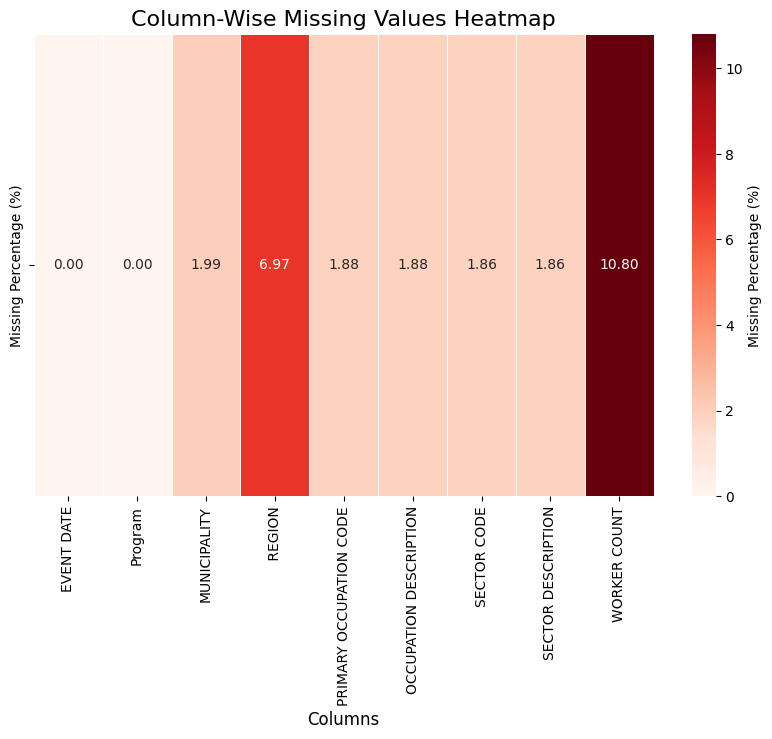

                         Missing Count  Missing Percentage (%)
Column                                                        
EVENT DATE                           0                0.000000
Program                              0                0.000000
MUNICIPALITY                       325                1.991300
 REGION                           1138                6.972612
PRIMARY OCCUPATION CODE            307                1.881012
OCCUPATION DESCRIPTION             307                1.881012
SECTOR CODE                        304                1.862631
SECTOR DESCRIPTION                 304                1.862631
WORKER COUNT                      1763               10.802034


In [7]:

# Create a DataFrame for missing values and percentages
missing_data = pd.DataFrame({
    'Column': df1.columns,
    'Missing Count': df1.isnull().sum(),
    'Missing Percentage (%)': (df1.isnull().sum() / len(df1)) * 100
}).set_index('Column')

# Plot heatmap for column-wise missing values
plt.figure(figsize=(10, 6))
sns.heatmap(
    missing_data[['Missing Percentage (%)']].T,  # Transpose for horizontal heatmap
    cmap="Reds",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Missing Percentage (%)'}
)

# Add title and axis labels
plt.title("Column-Wise Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("")

# Show the heatmap
plt.show()

# Print summary table for reference
print(missing_data)


**Insights from the Missing Values Heatmap**

**1. Columns Without Missing Values:**

* EVENT DATE and Program have no missing values (0%), ensuring their integrity for analysis.

**2. Columns with Minimal Missing Values:**

* MUNICIPALITY has 1.99% missing values (~325 rows).
* PRIMARY OCCUPATION CODE and OCCUPATION DESCRIPTION each have 1.88% missing values (~307 rows).
* SECTOR CODE and SECTOR DESCRIPTION each have 1.86% missing values (~304 rows).

  These missing percentages are manageable and can be imputed with mode (categorical) or mean/median (numerical).

**3. Moderate Missing Values:**

* REGION has 6.97% missing values (~1,138 rows).
As REGION is a categorical feature, missing values can be filled using the most frequent value (mode) or a placeholder such as "Unknown".

**4. Significant Missing Values:**
* WORKER COUNT has the highest percentage of missing values (10.80%, ~1,763 rows).

  Handling these missing values is critical, as this feature is likely important for further analysis. Depending on its type (numerical or categorical), strategies could include mean/mode imputation, advanced techniques like KNN imputation, or analyzing the impact of dropping rows.

**5. Data Quality Summary:**
  Overall, the dataset has a manageable amount of missing data, with most columns having fewer than 2% missing values, except for REGION and WORKER COUNT.

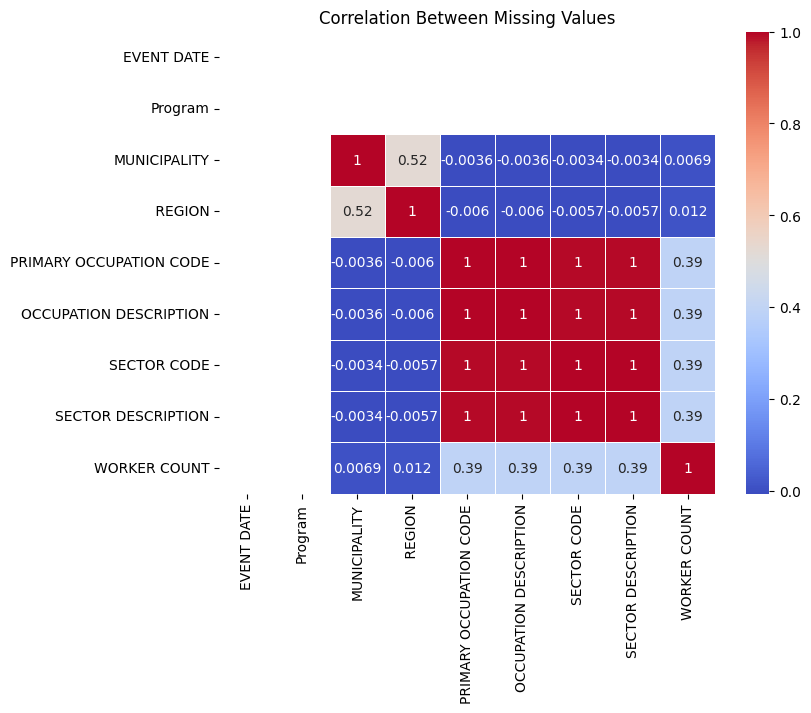

In [8]:
missing_corr = df1.isnull().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Missing Values")
plt.show()


# Key Observation:

* **High correlation between MUNICIPALITY** and  **REGION** (0.52)

  → This suggests that missing values in MUNICIPALITY are somewhat dependent on REGION, meaning imputing one can help fill the other.

* **High correlation among** PRIMARY OCCUPATION CODE, OCCUPATION DESCRIPTION, SECTOR CODE, and SECTOR DESCRIPTION **(~1.0)**

  → These variables are closely linked, indicating that if one is missing, others are likely missing too.

* **Moderate correlation between** WORKER COUNT and occupation/sector features **(0.39)**

  → Missing worker count might be related to missing occupational/sector information.

# Handle Missing Values Based on Data Type

**1. EVENT DATE (No Missing Values)**
* **Action:** No action required since there are no missing values in this column.

**2. Program (No Missing Values)**
* **Action:** No action required since there are no missing values in this column.

**3. MUNICIPALITY (325 Missing Values)**

**Data Type:** Categorical (String)

**Option 1:** Fill with the most frequent value (mode) if most events occur in a specific municipality.

**Option 2:** Use REGION to impute likely values (e.g., based on the most common municipality in each region).

In [9]:
#copying the orignal df in updated_df for imputation
updated_df1 = df1.copy()
updated_df1.head()

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49


In [10]:
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16321 entries, 0 to 16320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EVENT DATE               16321 non-null  object 
 1   Program                  16321 non-null  object 
 2   MUNICIPALITY             15996 non-null  object 
 3    REGION                  15183 non-null  object 
 4   PRIMARY OCCUPATION CODE  16014 non-null  float64
 5   OCCUPATION DESCRIPTION   16014 non-null  object 
 6   SECTOR CODE              16017 non-null  object 
 7   SECTOR DESCRIPTION       16017 non-null  object 
 8   WORKER COUNT             14558 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [11]:
df1.columns

Index(['EVENT DATE', 'Program', 'MUNICIPALITY', ' REGION',
       'PRIMARY OCCUPATION CODE', 'OCCUPATION DESCRIPTION', 'SECTOR CODE',
       'SECTOR DESCRIPTION', 'WORKER COUNT'],
      dtype='object')

In [12]:
df1.columns = df1.columns.str.strip()

In [13]:
df1.isnull().sum()

EVENT DATE                    0
Program                       0
MUNICIPALITY                325
REGION                     1138
PRIMARY OCCUPATION CODE     307
OCCUPATION DESCRIPTION      307
SECTOR CODE                 304
SECTOR DESCRIPTION          304
WORKER COUNT               1763
dtype: int64

In [14]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Checking the distribution of missing MUNICIPALITY values across different categories
df_missing_municipality = df1[df1["MUNICIPALITY"].isnull()]

# Creating a bar chart to show missing MUNICIPALITY counts per SECTOR DESCRIPTION
fig = px.bar(
    df_missing_municipality.groupby("SECTOR DESCRIPTION").size().reset_index(name="Missing Count"),
    x="SECTOR DESCRIPTION",
    y="Missing Count",
    title="Distribution of Missing MUNICIPALITY Across Sectors",
    labels={"SECTOR DESCRIPTION": "Sector Description", "Missing Count": "Count of Missing MUNICIPALITY"},
    color="Missing Count",
    color_continuous_scale="reds",
)

fig.update_layout(xaxis_tickangle=-45, height=500, width=800)
fig.show()

In [16]:
updated_df1.head()

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49


In [17]:
updated_df1.columns = updated_df1.columns.str.strip()

In [18]:
updated_df1.shape

(16321, 9)

In [19]:
updated_df1['MUNICIPALITY'].isnull().sum()

np.int64(325)

## **Step 2: Data Cleaning & Preprocessing**

    - Convert **Accident_Date** to datetime format as the data entered different format of dateformat .
    - Handle **missing values** using median/mode imputation.
    - Standardize categorical values (e.g., **province codes, city names**).
    - Remove duplicates and inconsistencies.
    - Create **derived features** like **accident_year** and **accident_month**.

In [20]:
def concise_missing_values_imputation(data):
    """
    Analyze, visualize (if missing values exist), and fill missing values using the correct imputation method.

    Parameters:
    - data: The input DataFrame containing missing values.

    Returns:
    - A DataFrame with missing values correctly imputed.
    """
    # Step 1: Analyze Missing Values
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

    # Step 2: Visualize Missing Values Only If They Exist
    if not missing_values.empty:
        fig = px.bar(
            x=missing_values.values,
            y=missing_values.index,
            orientation='h',
            title="Missing Values Distribution",
            labels={"x": "Number of Missing Values", "y": "Features"}
        )
        fig.show()

    # Step 3: Fill Missing Values Based on Feature Characteristics
    for feature in missing_values.index:
        if data[feature].dtype == 'object':
            mode_value = data[feature].mode()[0]
            print(f"Filling missing values in '{feature}' with mode: '{mode_value}'")
            data[feature].fillna(mode_value, inplace=True)

        elif feature == "PRIMARY OCCUPATION CODE":
            mode_value = data[feature].mode()[0]
            print(f"Filling missing values in '{feature}' with mode: {mode_value}")
            data[feature].fillna(mode_value, inplace=True)

        elif data[feature].dtype in ['int64', 'float64']:
            median_value = data[feature].median()
            print(f"Filling missing values in '{feature}' with median: {median_value}")
            data[feature].fillna(median_value, inplace=True)

        else:
            print(f"Skipping imputation for '{feature}' due to unsupported data type.")

    # Step 4: Verify Missing Values
    missing_values_after = data.isnull().sum().sum()
    print(f"Total Missing Values After Imputation: {missing_values_after}")

    return data

# Load dataset
dataset1 = updated_df1

# Apply the function
dataset1_cleaned = concise_missing_values_imputation(dataset1)

# Display first few rows
from IPython.display import display
display(dataset1_cleaned.head())


Filling missing values in 'WORKER COUNT' with mode: '50 or More'
Filling missing values in 'REGION' with mode: 'Central East'
Filling missing values in 'MUNICIPALITY' with mode: 'Toronto'
Filling missing values in 'PRIMARY OCCUPATION CODE' with mode: 611110.0
Filling missing values in 'OCCUPATION DESCRIPTION' with mode: 'Elementary and Secondary Schools'
Filling missing values in 'SECTOR CODE' with mode: 'EDUC'
Filling missing values in 'SECTOR DESCRIPTION' with mode: 'Education'
Total Missing Values After Imputation: 0


C:\Users\msura\AppData\Local\Temp\ipykernel_28644\4280135367.py:31: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\msura\AppData\Local\Temp\ipykernel_28644\4280135367.py:36: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49


In [21]:
updated_df1.isnull().sum()

EVENT DATE                 0
Program                    0
MUNICIPALITY               0
REGION                     0
PRIMARY OCCUPATION CODE    0
OCCUPATION DESCRIPTION     0
SECTOR CODE                0
SECTOR DESCRIPTION         0
WORKER COUNT               0
dtype: int64

In [22]:
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16321 entries, 0 to 16320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EVENT DATE               16321 non-null  object 
 1   Program                  16321 non-null  object 
 2   MUNICIPALITY             16321 non-null  object 
 3   REGION                   16321 non-null  object 
 4   PRIMARY OCCUPATION CODE  16321 non-null  float64
 5   OCCUPATION DESCRIPTION   16321 non-null  object 
 6   SECTOR CODE              16321 non-null  object 
 7   SECTOR DESCRIPTION       16321 non-null  object 
 8   WORKER COUNT             16321 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [23]:
updated_df1.duplicated().sum()

np.int64(30)

In [24]:
updated_df1.tail()

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
16316,30/11/2023,Industrial Health & Safety Program,Niagara Falls,South Western,445110.0,Supermarkets and Other Grocery (except Conveni...,RETL,Retail,50 or More
16317,30/11/2023,Industrial Health & Safety Program,Toronto,Central East,445110.0,Supermarkets and Other Grocery (except Conveni...,RETL,Retail,50 or More
16318,30/11/2023,Industrial Health & Safety Program,King,Central West,611110.0,Elementary and Secondary Schools,EDUC,Education,50 or More
16319,30/11/2023,Health Care Health & Safety Program,Toronto,Central East,624190.0,Other Individual and Family Services,TCSS,Treatment Clinics & Specialized Services,20 to 49
16320,30/11/2023,Health Care Health & Safety Program,Toronto,Central East,622111.0,General (except Paediatric) Hospitals,HOSP,Hospitals,50 or More


In [25]:
def verify_dataset_consistency(data):
    """
    Analyze and visualize dataset consistency, including duplicate records.

    Parameters:
    - data: The input DataFrame.

    Returns:
    - A DataFrame with duplicate analysis.
    """
    # Step 1: Check for duplicate records
    duplicate_count = data.duplicated().sum()
    total_records = data.shape[0]

    # Step 2: Visualize duplicates
    fig = px.bar(
        x=["Total Records", "Duplicate Records"],
        y=[total_records, duplicate_count],
        title="Dataset Consistency: Duplicate Records",
        labels={"x": "Record Type", "y": "Count"},
        text=[total_records, duplicate_count]
    )
    fig.show()

    # Step 3: Generate summary
    consistency_summary = pd.DataFrame({
        "Description": ["Total Records", "Duplicate Records", "Duplicates Percentage"],
        "Count": [total_records, duplicate_count, round((duplicate_count / total_records) * 100, 2)]
    })

    return consistency_summary

# Load dataset
dataset1 = updated_df1

# Apply the function
dataset_consistency = verify_dataset_consistency(dataset1)

# Display the results
from IPython.display import display
display(dataset_consistency)

# Step 4: Decision on Handling Duplicates
if dataset_consistency.loc[1, "Count"] > 0:
    print("\n✅ Duplicates detected. You may choose to drop them using the following command:")
    print("dataset1 = dataset1.drop_duplicates(keep='first')")
else:
    print("\n✅ No duplicates found. Dataset is clean.")

,Description,Count
0,Total Records,16321.00
1,Duplicate Records,30.00
2,Duplicates Percentage,0.18



✅ Duplicates detected. You may choose to drop them using the following command:
dataset1 = dataset1.drop_duplicates(keep='first')


In [26]:
import numpy as np

In [27]:
print(dataset1.duplicated().sum())

30


In [28]:
print(dataset1_cleaned.duplicated().sum())

30


In [29]:
updated_df1.duplicated().sum()

np.int64(30)

In [30]:
dataset1 = dataset1.drop_duplicates(keep='first')
dataset1.duplicated().sum()

np.int64(0)

In [31]:
dataset1.shape

(16291, 9)

In [32]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16320
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EVENT DATE               16291 non-null  object 
 1   Program                  16291 non-null  object 
 2   MUNICIPALITY             16291 non-null  object 
 3   REGION                   16291 non-null  object 
 4   PRIMARY OCCUPATION CODE  16291 non-null  float64
 5   OCCUPATION DESCRIPTION   16291 non-null  object 
 6   SECTOR CODE              16291 non-null  object 
 7   SECTOR DESCRIPTION       16291 non-null  object 
 8   WORKER COUNT             16291 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [33]:
dataset1.isnull().sum()

EVENT DATE                 0
Program                    0
MUNICIPALITY               0
REGION                     0
PRIMARY OCCUPATION CODE    0
OCCUPATION DESCRIPTION     0
SECTOR CODE                0
SECTOR DESCRIPTION         0
WORKER COUNT               0
dtype: int64

In [34]:
import plotly.figure_factory as ff

In [35]:
dataset1

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49
...,...,...,...,...,...,...,...,...,...
16316,30/11/2023,Industrial Health & Safety Program,Niagara Falls,South Western,445110.0,Supermarkets and Other Grocery (except Conveni...,RETL,Retail,50 or More
16317,30/11/2023,Industrial Health & Safety Program,Toronto,Central East,445110.0,Supermarkets and Other Grocery (except Conveni...,RETL,Retail,50 or More
16318,30/11/2023,Industrial Health & Safety Program,King,Central West,611110.0,Elementary and Secondary Schools,EDUC,Education,50 or More
16319,30/11/2023,Health Care Health & Safety Program,Toronto,Central East,624190.0,Other Individual and Family Services,TCSS,Treatment Clinics & Specialized Services,20 to 49


## **Step 3: Exploratory Data Analysis (EDA)**

In [36]:
def univariate_analysis_numerical(data):
    """
    Perform univariate analysis for numerical features with interactive visualizations.

    Parameters:
    - data: The input DataFrame.

    Returns:
    - Displays distributions of numerical features.
    """
    print("🔍 Univariate Analysis: Numerical Feature Distributions\n")

    # Identify numerical features
    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

    # Visualize each numerical feature distribution
    for feature in numerical_features:
        if data[feature].nunique() > 1:  # Ensure feature has variance before plotting
            fig = px.histogram(data, x=feature, nbins=30, title=f"Distribution of {feature}", marginal="box")
            fig.update_layout(xaxis_title=feature, yaxis_title="Count")
            fig.show()

# Apply the function for numerical analysis
univariate_analysis_numerical(dataset1)

🔍 Univariate Analysis: Numerical Feature Distributions



In [37]:
updated_df1.shape

(16321, 9)

In [38]:
dataset1.shape

(16291, 9)

In [39]:
dataset1_cleaned.shape

(16321, 9)

In [40]:
dataset1.head()

,EVENT DATE,Program,MUNICIPALITY,REGION,PRIMARY OCCUPATION CODE,OCCUPATION DESCRIPTION,SECTOR CODE,SECTOR DESCRIPTION,WORKER COUNT
0,1/4/2017,Industrial Health & Safety Program,Scarborough,Central East,722512.0,Limited-service eating places,FOOD,"Food, Beverage & Tobacco",20 to 49
1,12/30/2017,Industrial Health & Safety Program,North Bay,Northern,332510.0,Hardware Manufacturing,FABR,Wood & Metal Fabrication,6 to 19
2,1/2/2017,Industrial Health & Safety Program,Whitby,Central East,611110.0,Elementary and Secondary Schools,EDUC,Education,20 to 49
3,1/8/2017,Industrial Health & Safety Program,Toronto,Central East,326193.0,Motor Vehicle Plastic Parts Manufacturing,AUTO,Automotive,50 or More
4,12/31/2017,Industrial Health & Safety Program,Toronto,Central East,493110.0,General Warehousing and Storage,NECI,NEC - Industrial,20 to 49


In [41]:
dataset1.columns

Index(['EVENT DATE', 'Program', 'MUNICIPALITY', 'REGION',
       'PRIMARY OCCUPATION CODE', 'OCCUPATION DESCRIPTION', 'SECTOR CODE',
       'SECTOR DESCRIPTION', 'WORKER COUNT'],
      dtype='object')

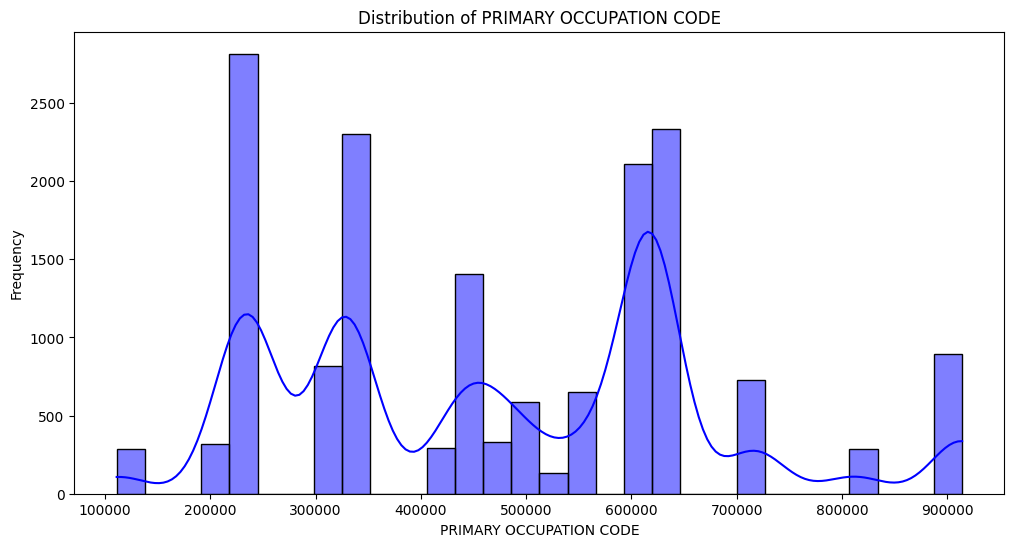

C:\Users\msura\AppData\Local\Temp\ipykernel_28644\2346172286.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




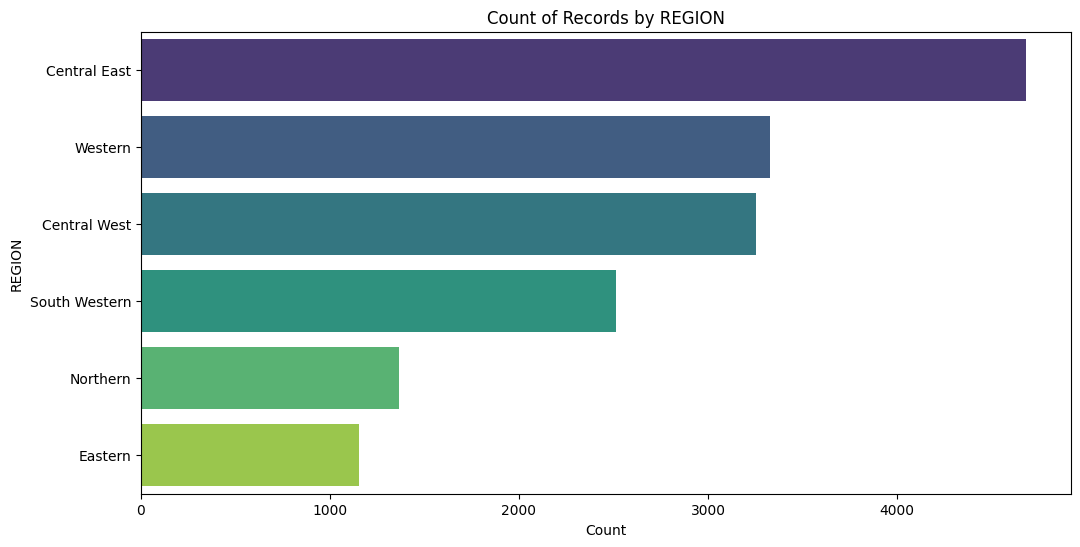

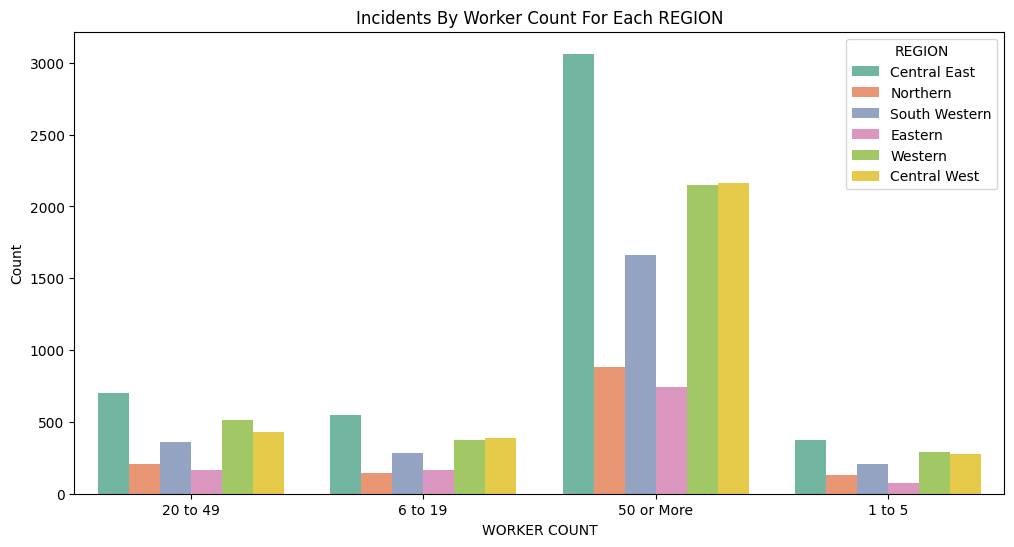

In [42]:
# Univariate Analysis: Distribution of numerical and categorical variables
plt.figure(figsize=(12, 6))
sns.histplot(dataset1['PRIMARY OCCUPATION CODE'], kde=True, bins=30, color='blue')
plt.title('Distribution of PRIMARY OCCUPATION CODE')
plt.xlabel('PRIMARY OCCUPATION CODE')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=dataset1, y='REGION', order=dataset1['REGION'].value_counts().index, palette='viridis')
plt.title('Count of Records by REGION')
plt.xlabel('Count')
plt.ylabel('REGION')
plt.show()

# Bivariate Analysis: Relationship between REGION and WORKER COUNT
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset1, x='WORKER COUNT', hue='REGION', palette='Set2')
plt.title('Incidents By Worker Count For Each REGION')
plt.xlabel('WORKER COUNT')
plt.ylabel('Count')
plt.legend(title='REGION')
plt.show()


C:\Users\msura\AppData\Local\Temp\ipykernel_28644\397799092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




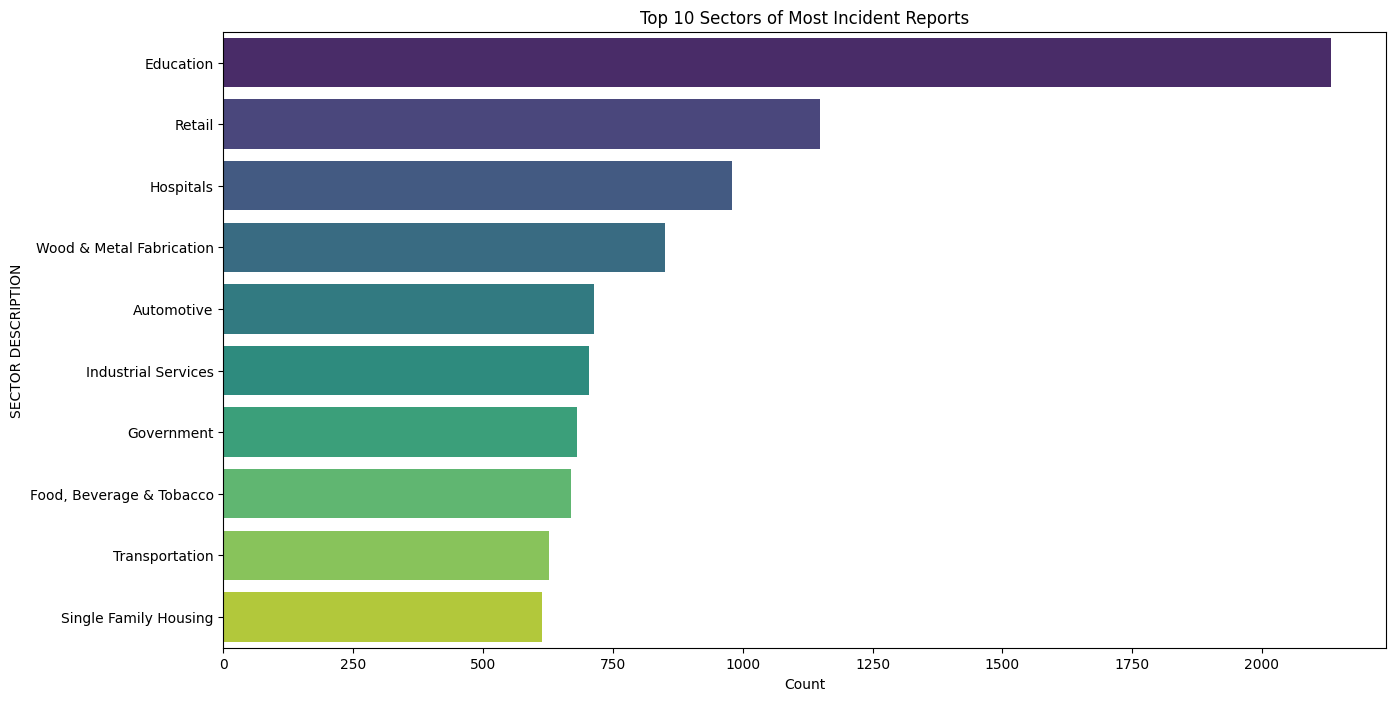

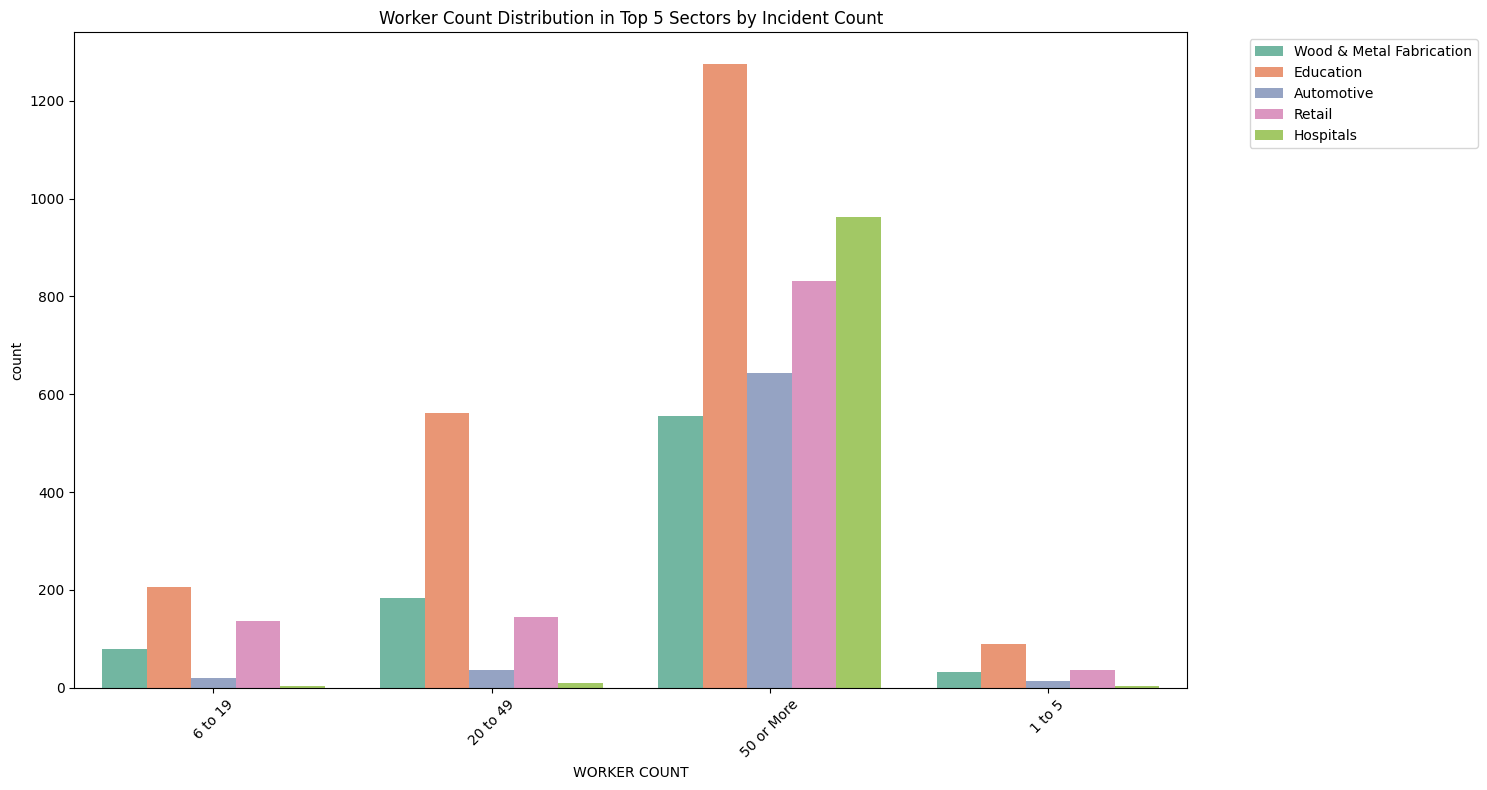

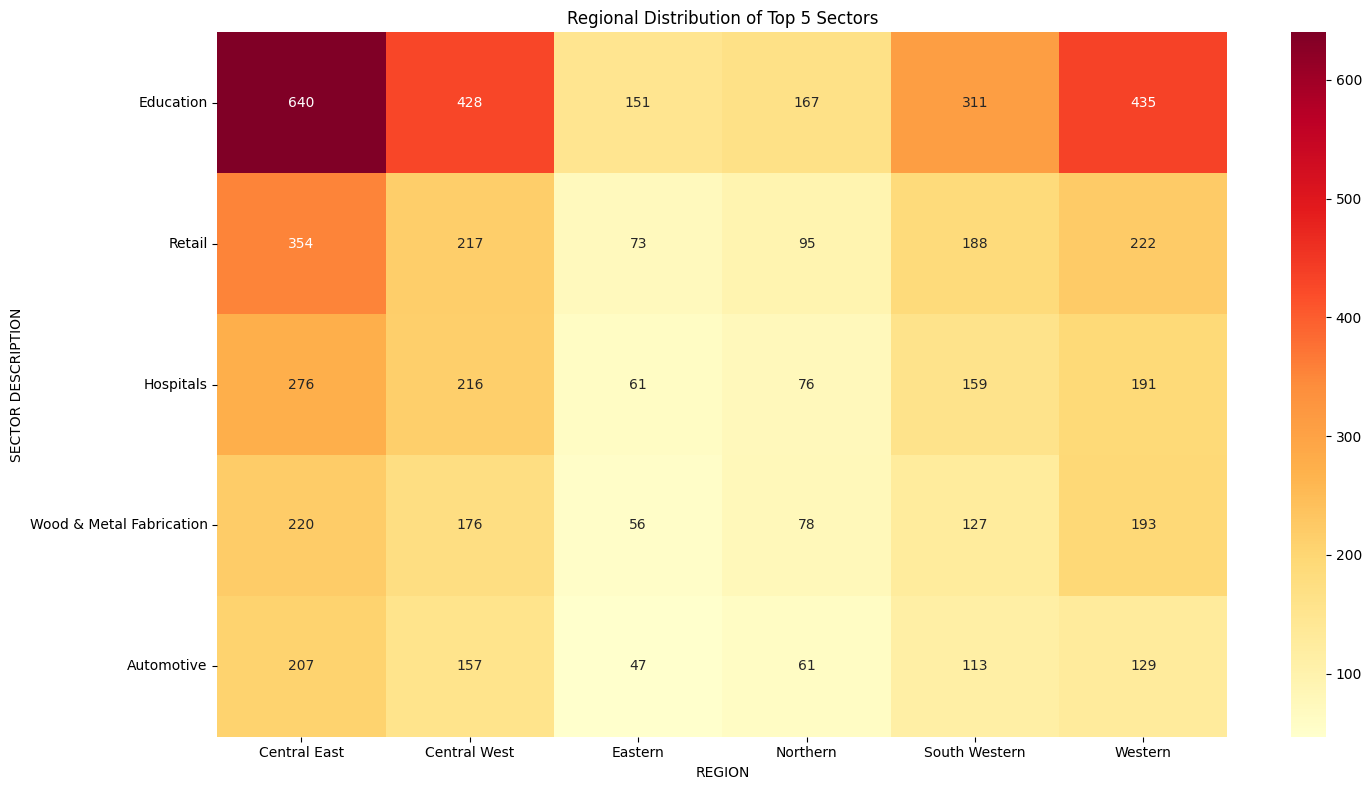

Statistical Summary of Top 5 Sectors:
                          Total Records  REGION  Number of Municipalities
SECTOR DESCRIPTION                                                       
Automotive                          714       6                       202
Education                          2132       6                       363
Hospitals                           979       6                       225
Retail                             1149       6                       251
Wood & Metal Fabrication            850       6                       240


In [43]:
# 1. Sector Analysis
plt.figure(figsize=(15, 8))
sector_counts = dataset1['SECTOR DESCRIPTION'].value_counts().head(10)
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette='viridis')
plt.title('Top 10 Sectors of Most Incident Reports')
plt.xlabel('Count')
plt.show()

# 2. Worker Count Distribution by Sector (Top 5 sectors)
plt.figure(figsize=(15, 8))
top_5_sectors = dataset1['SECTOR DESCRIPTION'].value_counts().head(5).index
df_top_sectors = dataset1[dataset1['SECTOR DESCRIPTION'].isin(top_5_sectors)]
sns.countplot(data=df_top_sectors, x='WORKER COUNT', hue='SECTOR DESCRIPTION', palette='Set2')
plt.title('Worker Count Distribution in Top 5 Sectors by Incident Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Regional Distribution of Top Sectors
plt.figure(figsize=(15, 8))
pivot_table = pd.crosstab(dataset1['SECTOR DESCRIPTION'], dataset1['REGION'])
pivot_table_top = pivot_table.loc[top_5_sectors]
sns.heatmap(pivot_table_top, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Regional Distribution of Top 5 Sectors')
plt.tight_layout()
plt.show()

# 4. Statistical Summary of Top Sectors
print("\
Statistical Summary of Top 5 Sectors:")
sector_summary = dataset1[dataset1['SECTOR DESCRIPTION'].isin(top_5_sectors)].groupby('SECTOR DESCRIPTION').agg({
    'WORKER COUNT': 'count',
    'REGION': lambda x: x.nunique(),
    'MUNICIPALITY': lambda x: x.nunique()
}).rename(columns={
    'WORKER COUNT': 'Total Records',
    ' REGION': 'Number of Regions',
    'MUNICIPALITY': 'Number of Municipalities'
})
print(sector_summary)

##### Key Insights:

- Education sector has the highest representation with 2,136 records
- All sectors are present across all 6 regions, showing wide geographical distribution
- Education has the highest municipal presence (363 municipalities)
- Automotive sector has the lowest municipal presence (202 municipalities)
- Retail shows strong presence across both records and municipalities

Dataset Summary:
Time Period:
Start Date: 2017-01-01 00:00:00
End Date: 2023-12-31 00:00:00
Total number of records: 16291
Number of unique sectors: 89
Number of regions: 6


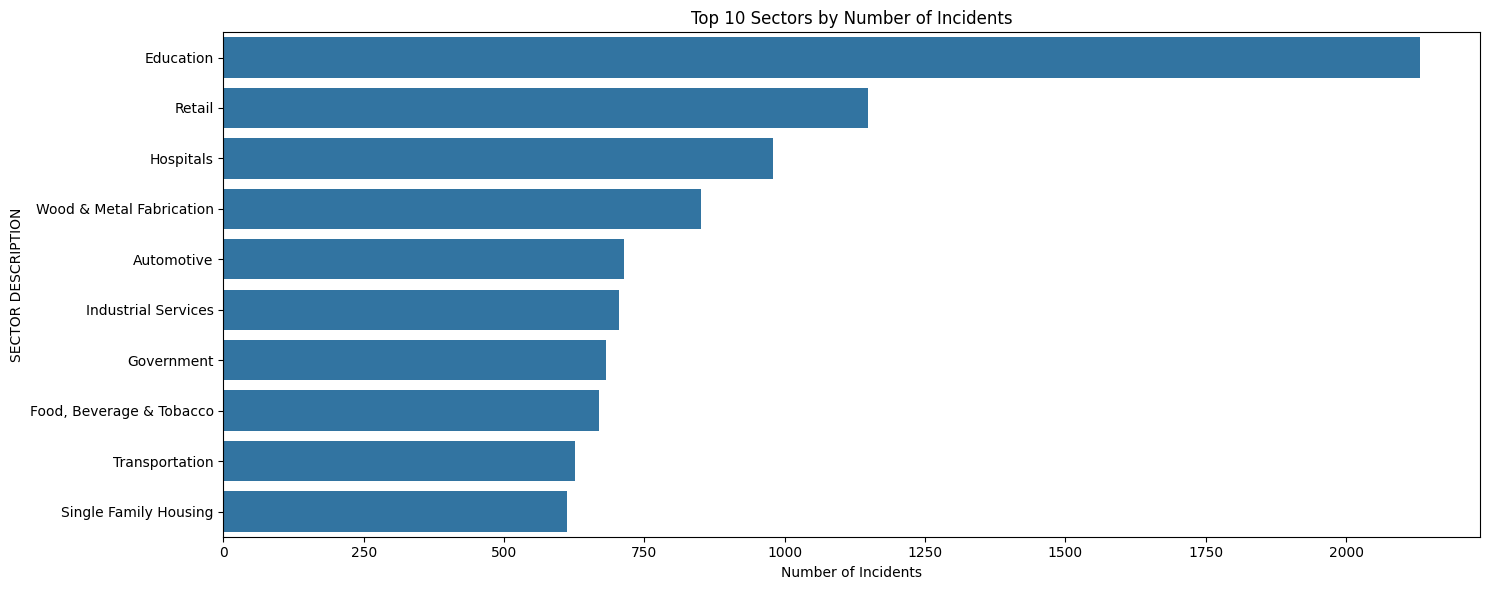

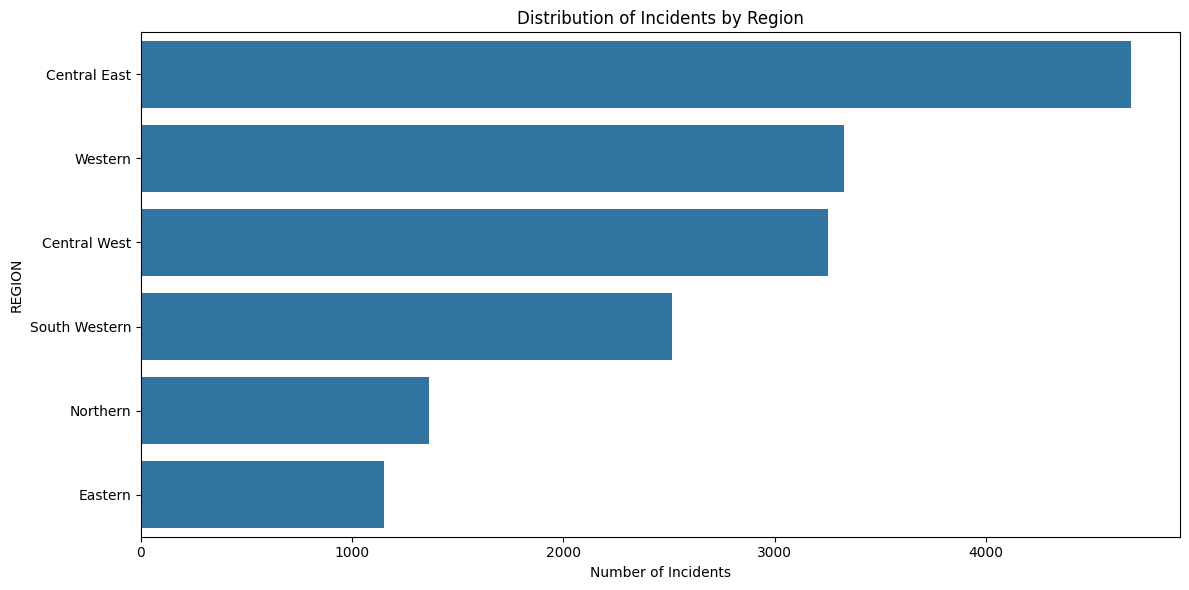

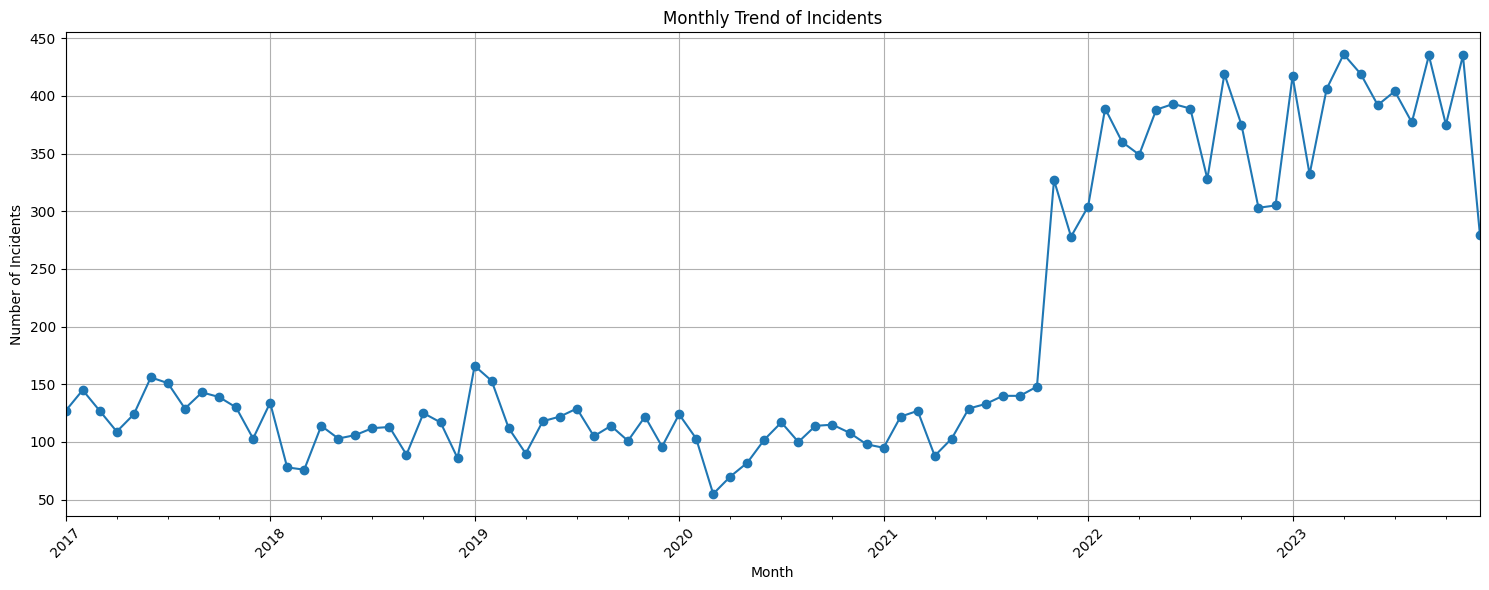

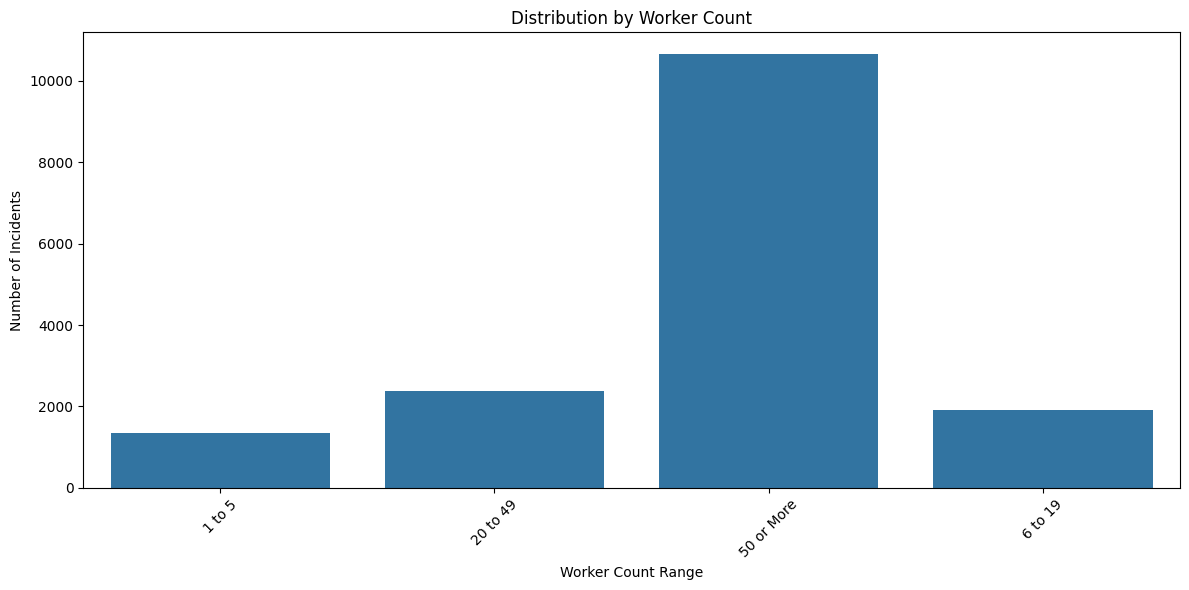

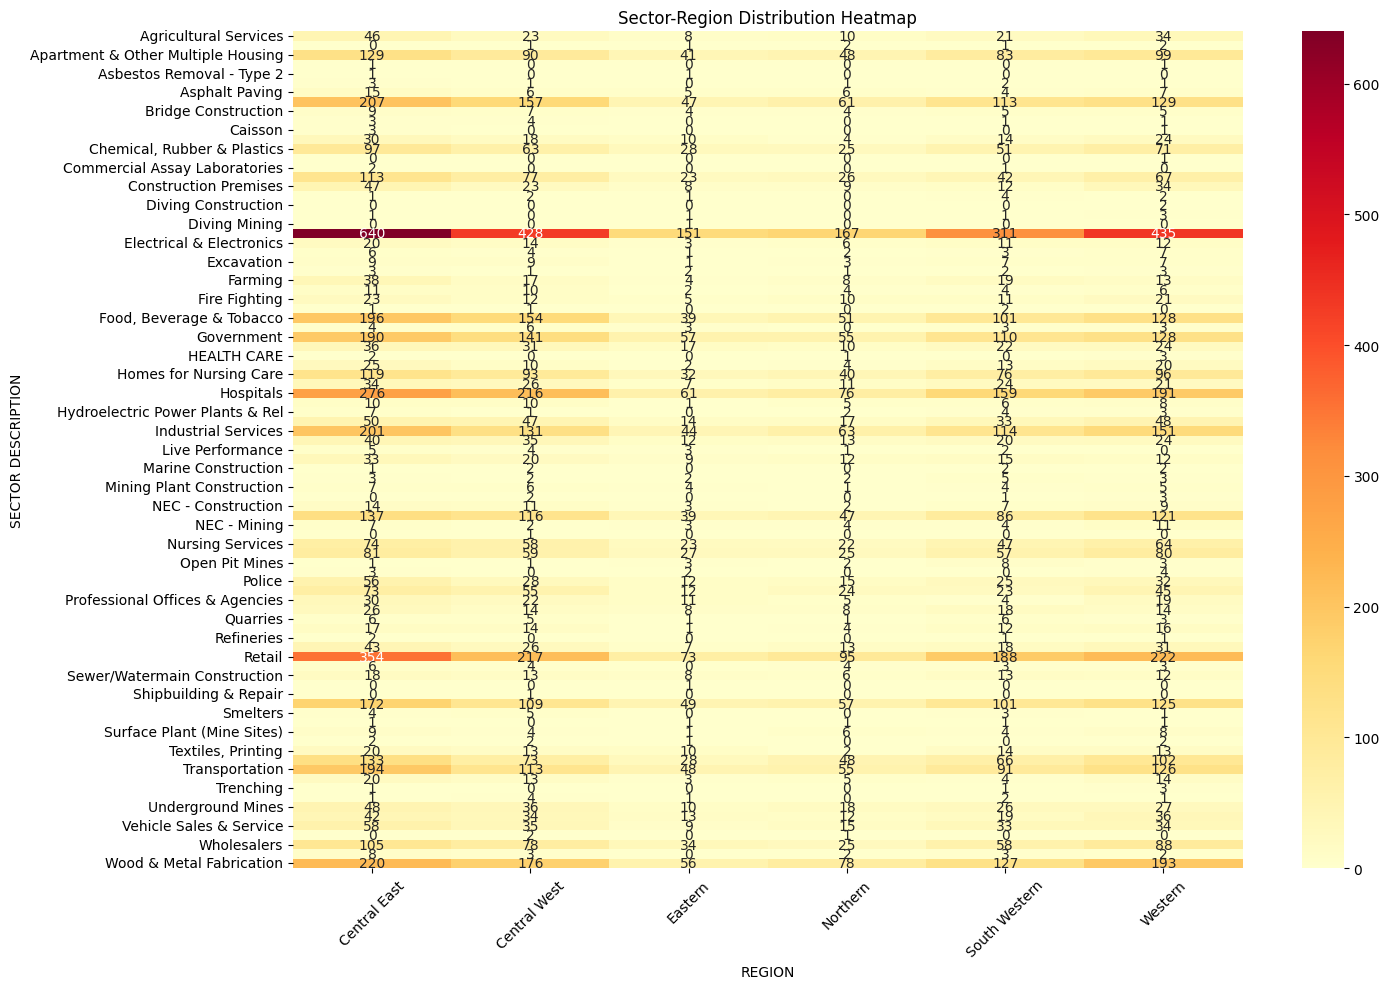

In [44]:
# Convert dates with mixed format
dataset1['EVENT DATE'] = pd.to_datetime(dataset1['EVENT DATE'], format='mixed', dayfirst=True)

# Basic summary statistics
print("Dataset Summary:\
")
print("Time Period:")
print("Start Date:", dataset1['EVENT DATE'].min())
print("End Date:", dataset1['EVENT DATE'].max())
print("\
Total number of records:", len(dataset1))
print("\
Number of unique sectors:", dataset1['SECTOR DESCRIPTION'].nunique())
print("Number of regions:", dataset1['REGION'].nunique())

# Sector Analysis
plt.figure(figsize=(15, 6))
sector_counts = dataset1['SECTOR DESCRIPTION'].value_counts().head(10)
sns.barplot(x=sector_counts.values, y=sector_counts.index)
plt.title('Top 10 Sectors by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Regional Distribution
plt.figure(figsize=(12, 6))
region_counts = dataset1['REGION'].value_counts()
sns.barplot(x=region_counts.values, y=region_counts.index)
plt.title('Distribution of Incidents by Region')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Monthly Trend Analysis
dataset1['Month'] = dataset1['EVENT DATE'].dt.to_period('M')
monthly_Inspections = dataset1.groupby('Month').size()

plt.figure(figsize=(15, 6))
monthly_Inspections.plot(kind='line', marker='o')
plt.title('Monthly Trend of Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Worker Count Distribution
plt.figure(figsize=(12, 6))
worker_counts = dataset1['WORKER COUNT'].value_counts().sort_index()
sns.barplot(x=worker_counts.index, y=worker_counts.values)
plt.title('Distribution by Worker Count')
plt.xlabel('Worker Count Range')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-tabulation of Sector and Region
cross_tab = pd.crosstab(dataset1['SECTOR DESCRIPTION'], dataset1['REGION'])
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Sector-Region Distribution Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

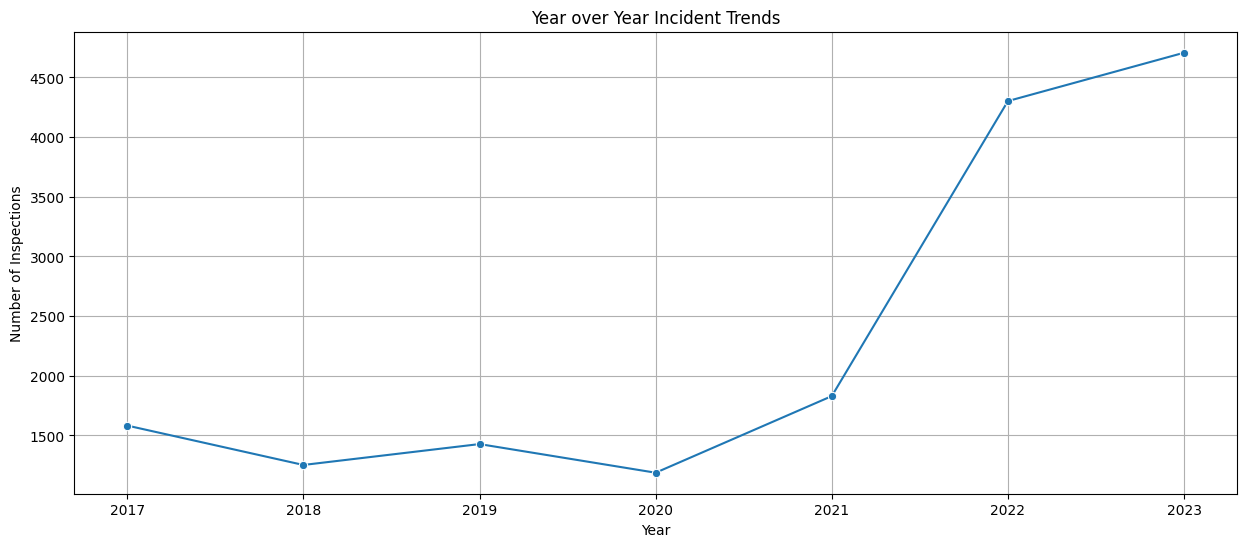

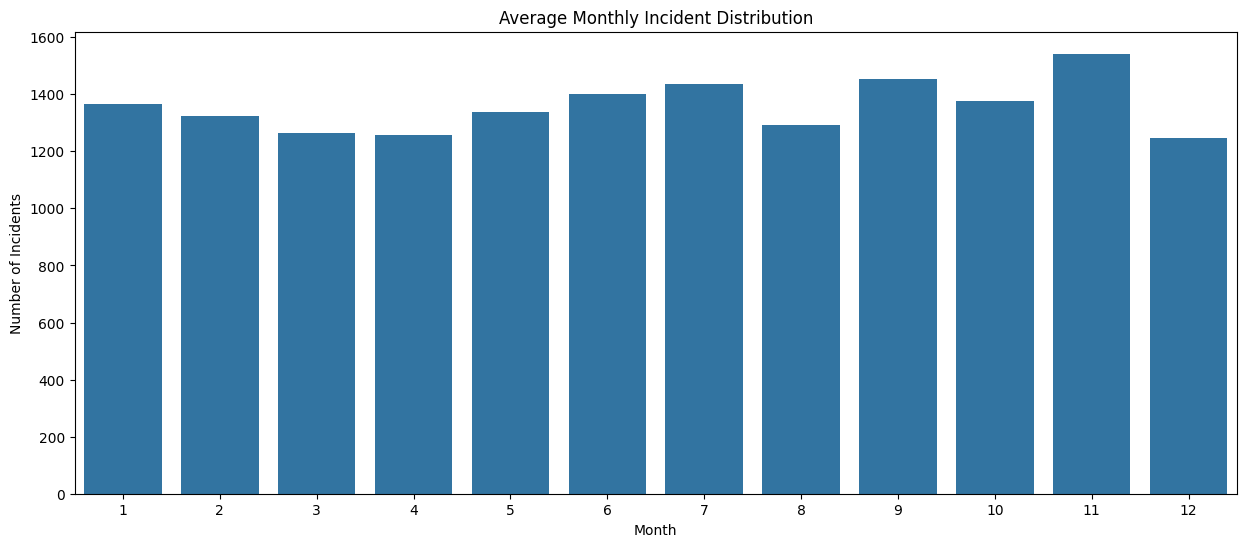

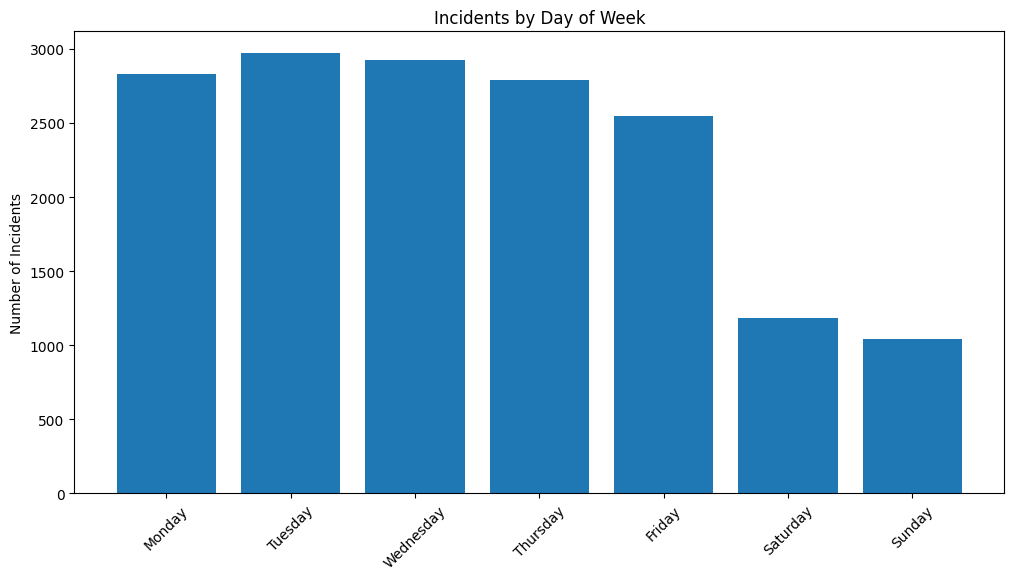

Incident Distribution Statistics:
Yearly Statistics:
count       7.000000
mean     2327.285714
std      1506.904522
min      1188.000000
25%      1340.500000
50%      1583.000000
75%      3066.000000
max      4707.000000
dtype: float64
Quarterly Distribution:
Quarter     1     2     3     4
Year                           
2017      399   389   423   372
2018      288   323   314   328
2019      431   330   348   319
2020      282   254   331   321
2021      344   320   413   753
2022     1053  1130  1136   983
2023     1155  1247  1216  1089


In [45]:
from datetime import datetime

# 1. Time-based Analysis
dataset1['Year'] = dataset1['EVENT DATE'].dt.year
dataset1['Month'] = dataset1['EVENT DATE'].dt.month
dataset1['Day_of_Week'] = dataset1['EVENT DATE'].dt.dayofweek
dataset1['Quarter'] = dataset1['EVENT DATE'].dt.quarter

# Year over Year comparison
plt.figure(figsize=(15, 6))
yearly_trend = dataset1['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title('Year over Year Incident Trends')
plt.xlabel('Year')
plt.ylabel('Number of Inspections')
plt.grid(True)
plt.show()

# Monthly patterns across years
plt.figure(figsize=(15, 6))
monthly_avg = dataset1.groupby('Month').size().reset_index()
monthly_avg.columns = ['Month', 'Count']
sns.barplot(data=monthly_avg, x='Month', y='Count')
plt.title('Average Monthly Incident Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

# Day of week analysis
plt.figure(figsize=(12, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dataset1['Day_of_Week'].value_counts().sort_index()
plt.bar(day_names, dow_counts)
plt.title('Incidents by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Number of Incidents')
plt.show()

# Print summary statistics
print("\
Incident Distribution Statistics:")
print("\
Yearly Statistics:")
print(dataset1.groupby('Year').size().describe())
print("\
Quarterly Distribution:")
print(dataset1.groupby(['Year', 'Quarter']).size().unstack())

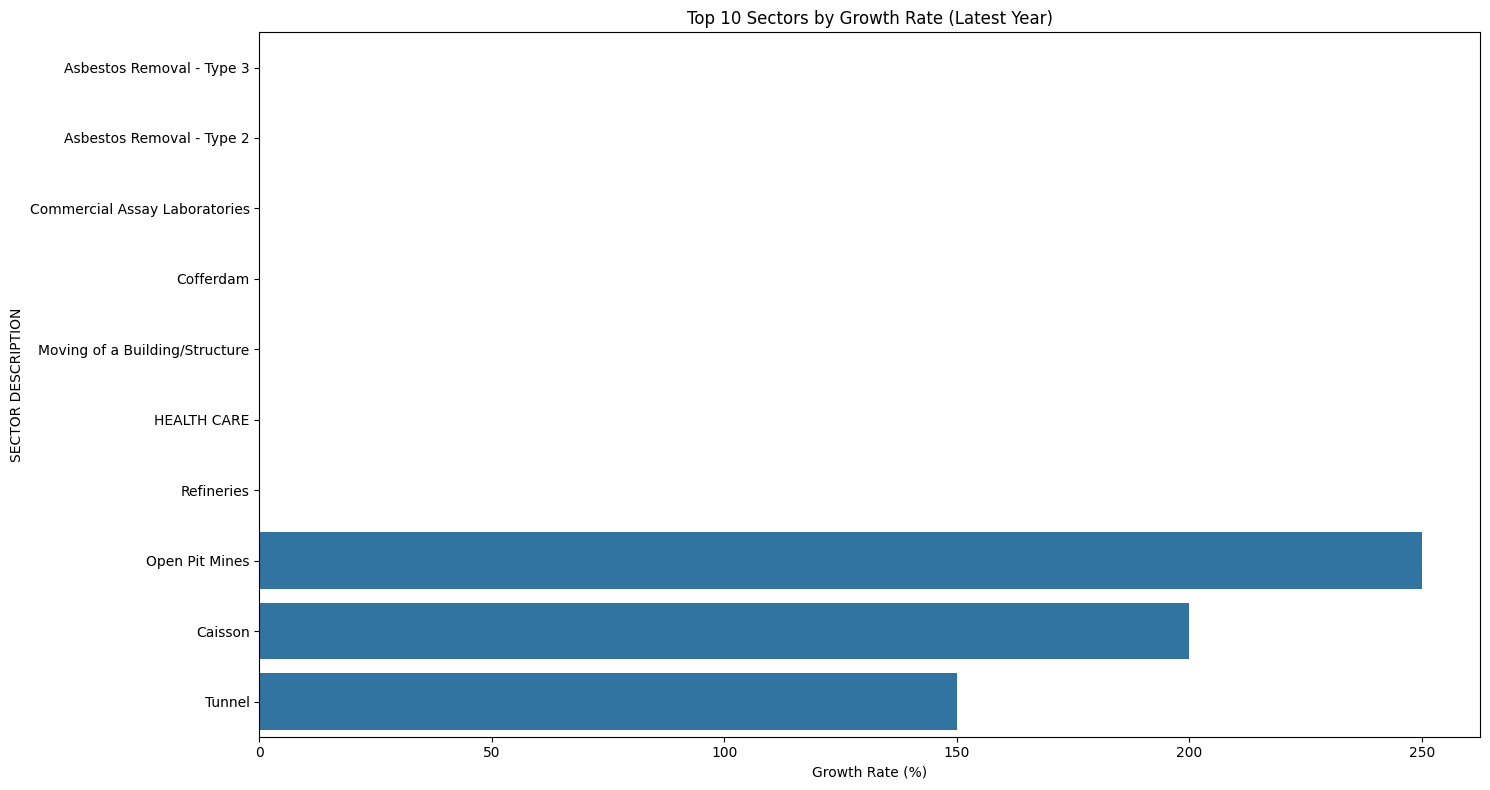

<Figure size 1500x800 with 0 Axes>

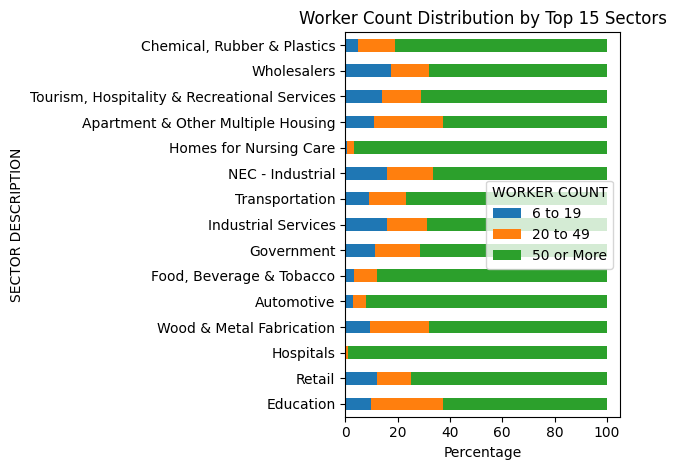

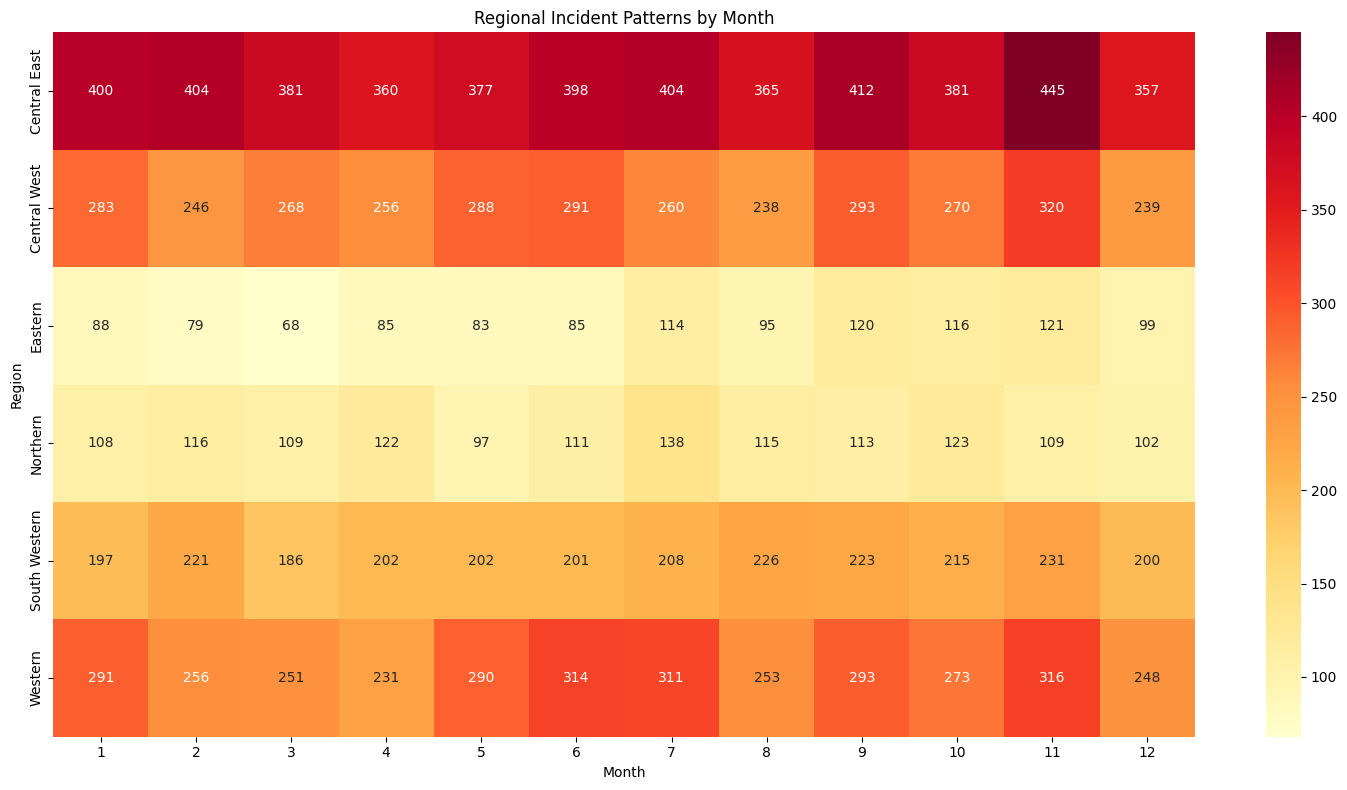

Sector Growth Statistics:
Top 5 Fastest Growing Sectors (Latest Year):
SECTOR DESCRIPTION
Asbestos Removal - Type 3         inf
Asbestos Removal - Type 2         inf
Commercial Assay Laboratories     inf
Cofferdam                         inf
Moving of a Building/Structure    inf
Name: 2023, dtype: float64
Regional Monthly Statistics:
Mean Monthly Inspections by Region:
REGION
Central East     390.33
Central West     271.00
Eastern           96.08
Northern         113.58
South Western    209.33
Western          277.25
dtype: float64
Standard Deviation of Monthly Inspections by Region:
REGION
Central East     25.24
Central West     24.89
Eastern          17.79
Northern         10.67
South Western    13.70
Western          29.13
dtype: float64


In [46]:
# 2. Advanced Sector Analysis

# Create a pivot table for sector analysis by year
sector_year_pivot = pd.pivot_table(dataset1, 
                                 index='SECTOR DESCRIPTION',
                                 columns='Year',
                                 aggfunc='size',
                                 fill_value=0)

# Calculate year-over-year growth for sectors
sector_growth = sector_year_pivot.pct_change(axis=1) * 100

# Top 10 growing sectors (based on most recent year)
top_growing = sector_growth[sector_growth.columns[-1]].sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_growing.values, y=top_growing.index)
plt.title('Top 10 Sectors by Growth Rate (Latest Year)')
plt.xlabel('Growth Rate (%)')
plt.tight_layout()
plt.show()

# 3. Worker Count Analysis
# Convert worker count ranges to categorical ordered
worker_order = ['6 to 19', '20 to 49', '50 or More']
dataset1['WORKER COUNT'] = pd.Categorical(dataset1['WORKER COUNT'], categories=worker_order, ordered=True)

# Worker count distribution by sector
plt.figure(figsize=(15, 8))
worker_sector = pd.crosstab(dataset1['SECTOR DESCRIPTION'], dataset1['WORKER COUNT'])
worker_sector_pct = worker_sector.div(worker_sector.sum(axis=1), axis=0) * 100

# Plot top 15 sectors by total Inspections
top_15_sectors = worker_sector.sum(axis=1).sort_values(ascending=False).head(15).index
worker_sector_pct.loc[top_15_sectors].plot(kind='barh', stacked=True)
plt.title('Worker Count Distribution by Top 15 Sectors')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

# 4. Regional Analysis with Seasonality
# Create a pivot table for region and month
region_month_pivot = pd.pivot_table(dataset1,
                                  index='REGION',
                                  columns='Month',
                                  aggfunc='size',
                                  fill_value=0)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(region_month_pivot, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Regional Incident Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Print statistical insights
print("\
Sector Growth Statistics:")
print("\
Top 5 Fastest Growing Sectors (Latest Year):")
print(top_growing.head().round(2))

print("\
Regional Monthly Statistics:")
print("\
Mean Monthly Inspections by Region:")
print(region_month_pivot.mean(axis=1).round(2))
print("\
Standard Deviation of Monthly Inspections by Region:")
print(region_month_pivot.std(axis=1).round(2))

In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Step 5: Data Reporting & Visualization**

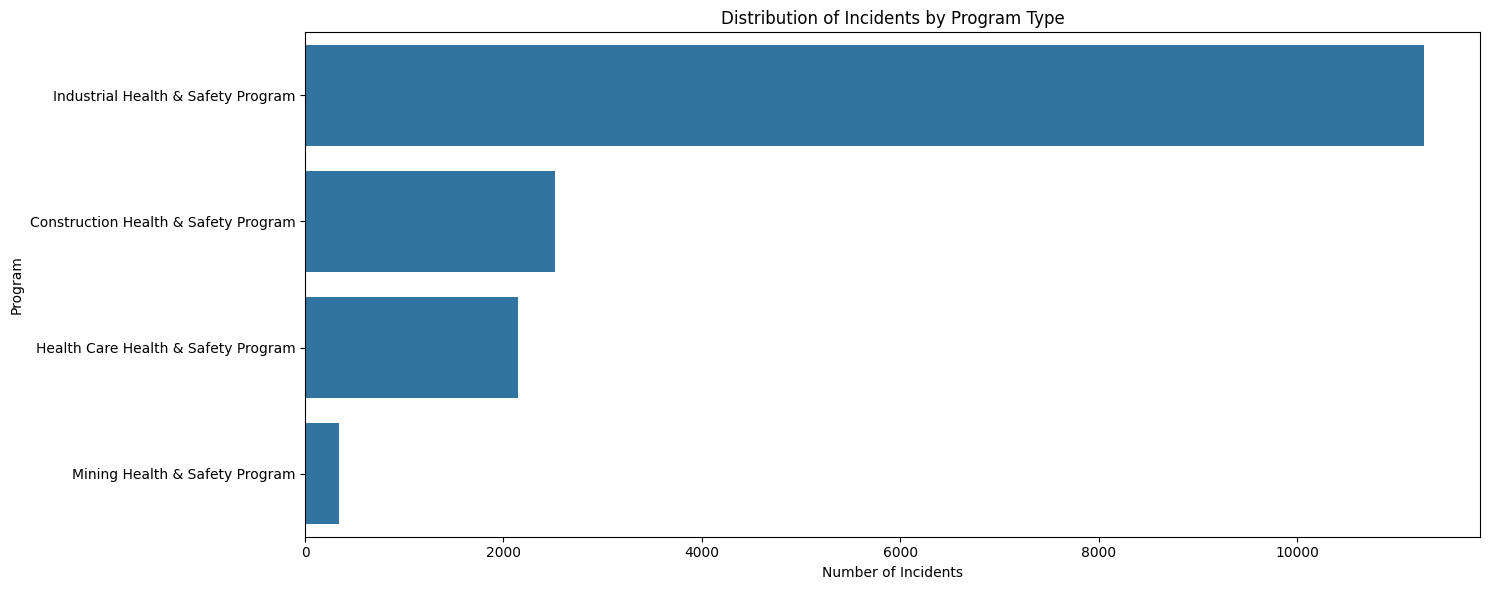

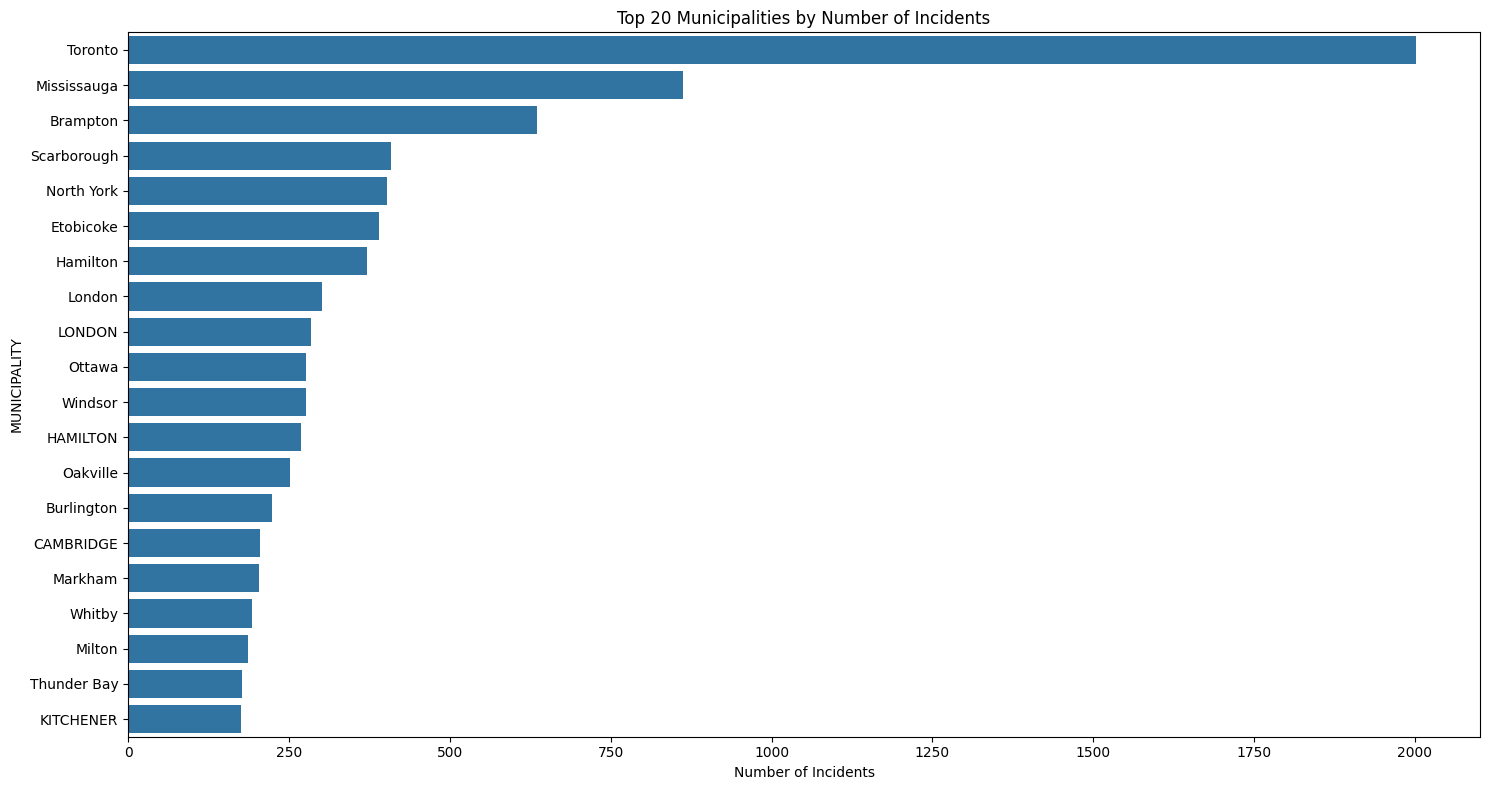

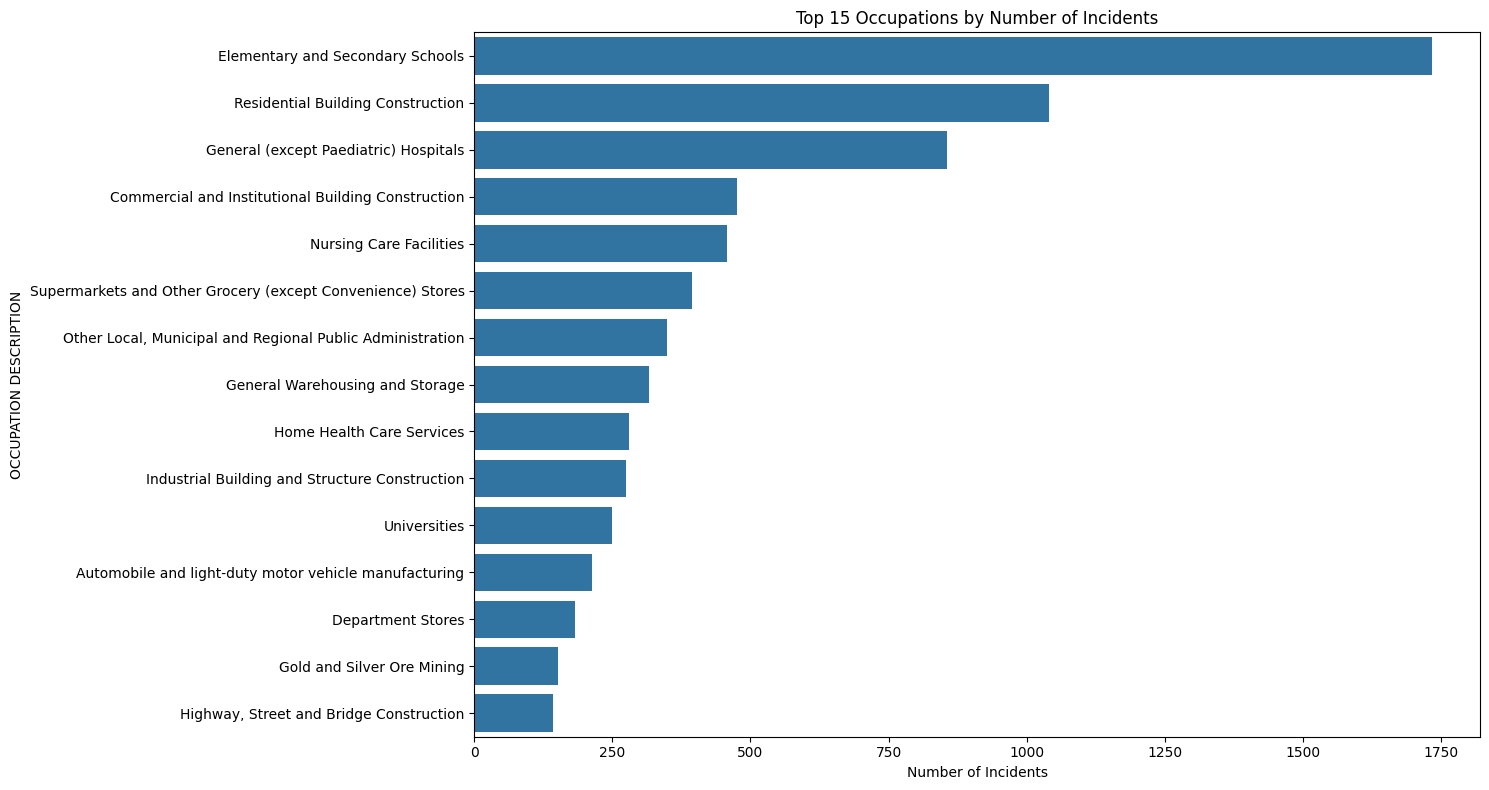

Program Distribution:
                                      count
Program                                    
Industrial Health & Safety Program    11279
Construction Health & Safety Program   2520
Health Care Health & Safety Program    2147
Mining Health & Safety Program          345
Top 10 Municipalities with Highest Incident Rates:
              count
MUNICIPALITY       
Toronto        2001
Mississauga     862
Brampton        636
Scarborough     409
North York      403
Etobicoke       390
Hamilton        372
London          302
LONDON          285
Ottawa          276
Top 10 Occupations with Highest Incident Rates:
                                                    count
OCCUPATION DESCRIPTION                                   
Elementary and Secondary Schools                     1734
Residential Building Construction                    1040
General (except Paediatric) Hospitals                 855
Commercial and Institutional Building Construction    475
Nursing Care Facilities    

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# 1. Program Type Analysis
plt.figure(figsize=(15, 6))
program_counts = dataset1['Program'].value_counts()
sns.barplot(x=program_counts.values, y=program_counts.index)
plt.title('Distribution of Incidents by Program Type')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# 2. Municipality Analysis - Top 20 municipalities
plt.figure(figsize=(15, 8))
municipality_counts = dataset1['MUNICIPALITY'].value_counts().head(20)
sns.barplot(x=municipality_counts.values, y=municipality_counts.index)
plt.title('Top 20 Municipalities by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# 3. Occupation Analysis
plt.figure(figsize=(15, 8))
occupation_counts = dataset1['OCCUPATION DESCRIPTION'].value_counts().head(15)
sns.barplot(x=occupation_counts.values, y=occupation_counts.index)
plt.title('Top 15 Occupations by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Program Distribution:")
print(dataset1['Program'].value_counts().to_frame())

print("\
Top 10 Municipalities with Highest Incident Rates:")
print(dataset1['MUNICIPALITY'].value_counts().head(10).to_frame())

print("\
Top 10 Occupations with Highest Incident Rates:")
print(dataset1['OCCUPATION DESCRIPTION'].value_counts().head(10).to_frame())

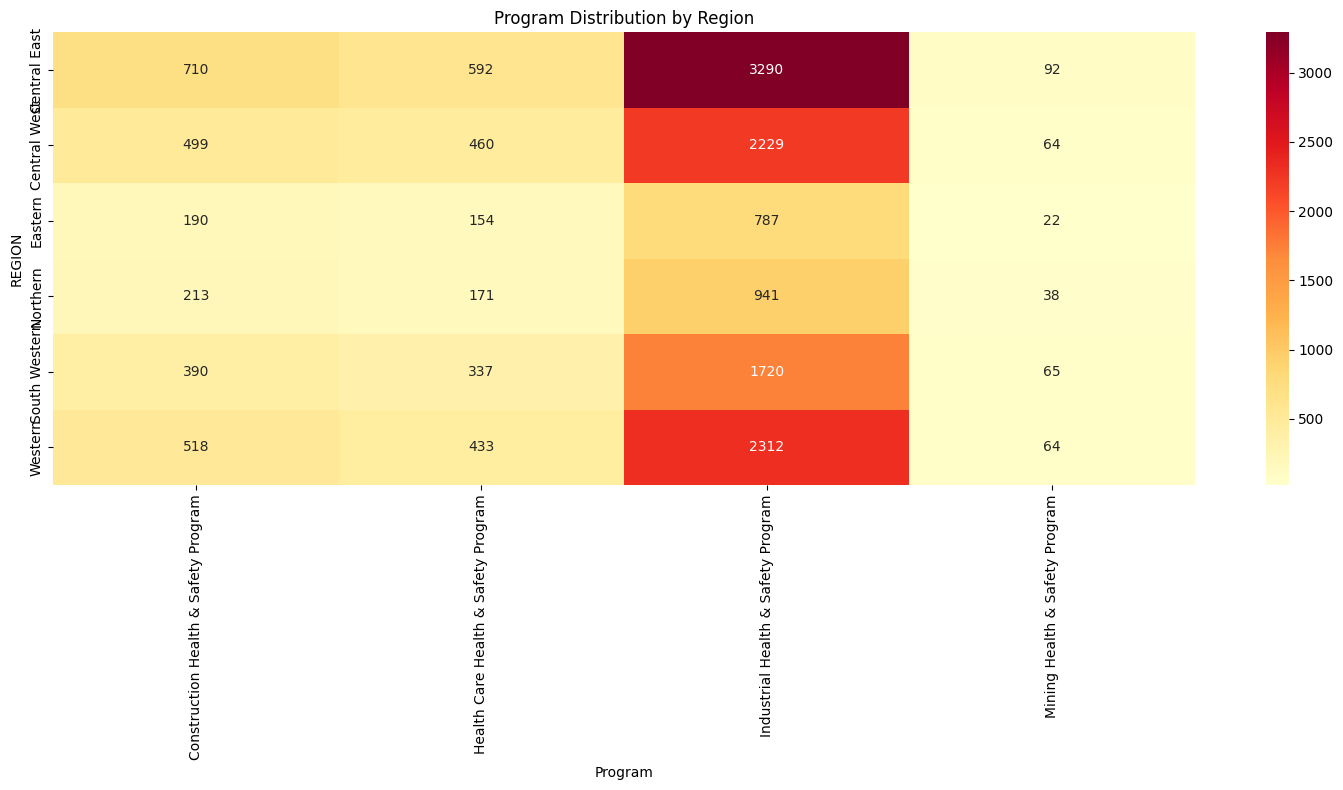

<Figure size 1500x800 with 0 Axes>

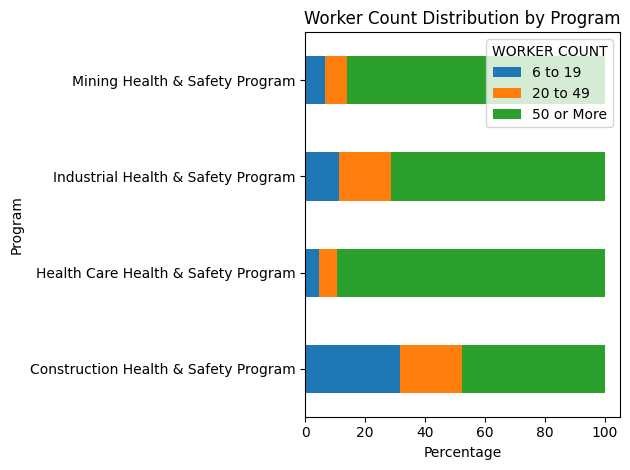

<Figure size 1500x800 with 0 Axes>

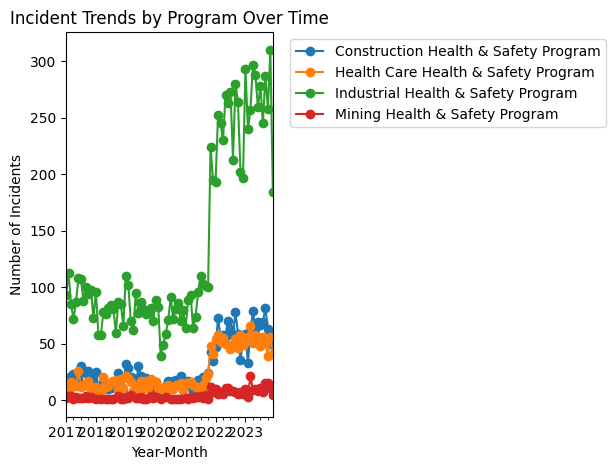

Program Distribution by Region:
Program        Construction Health & Safety Program  \
REGION                                                
Central East                                    710   
Central West                                    499   
Eastern                                         190   
Northern                                        213   
South Western                                   390   
Western                                         518   

Program        Health Care Health & Safety Program  \
REGION                                               
Central East                                   592   
Central West                                   460   
Eastern                                        154   
Northern                                       171   
South Western                                  337   
Western                                        433   

Program        Industrial Health & Safety Program  \
REGION                                   

In [49]:
# 4. Cross Analysis: Region vs Program Type
plt.figure(figsize=(15, 8))
region_program = pd.crosstab(dataset1['REGION'], dataset1['Program'])
sns.heatmap(region_program, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Program Distribution by Region')
plt.tight_layout()
plt.show()

# 5. Worker Count Analysis by Program
plt.figure(figsize=(15, 8))
worker_program = pd.crosstab(dataset1['Program'], dataset1['WORKER COUNT'])
worker_program_pct = worker_program.div(worker_program.sum(axis=1), axis=0) * 100
worker_program_pct.plot(kind='barh', stacked=True)
plt.title('Worker Count Distribution by Program')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

# 6. Time Series Analysis by Program
dataset1['YearMonth'] = pd.to_datetime(dataset1['EVENT DATE']).dt.to_period('M')
program_time = dataset1.groupby(['YearMonth', 'Program']).size().unstack()

plt.figure(figsize=(15, 8))
program_time.plot(marker='o')
plt.title('Incident Trends by Program Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print additional statistics
print("\
Program Distribution by Region:")
print(region_program)

print("\
Worker Count Distribution by Program (%):")
print(worker_program_pct.round(2))

# Calculate correlation between different programs
print("\
Correlation between Program Incident Rates:")
print(program_time.corr().round(2))

In [73]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, IFrame

# Convert YearMonth to string for better x-axis formatting
program_time.index = program_time.index.astype(str)

# Create the interactive plot
fig = go.Figure()

# Add traces for each program
for column in program_time.columns:
    fig.add_trace(
        go.Scatter(
            x=program_time.index,
            y=program_time[column],
            name=column,
            mode='lines',
            stackgroup='one',  # this makes it stacked
            hovertemplate="<b>%{x}</b><br>" +
                         "Program: " + column + "<br>" +
                         "Incidents: %{y}<br>" +
                         "<extra></extra>"  # removes trace info from hover
        )
    )

# Update layout
fig.update_layout(
    title='Incident Trends by Program Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Number of Incidents',
    hovermode='x unified',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    ),
    width=1200,
    height=600
)

# Show the plot in the Jupyter Notebook
fig.show()

# Save the interactive plot as an HTML file
html_file = "incident_trends_interactive.html"
pio.write_html(fig, file=html_file, auto_open=False)

# Display the saved HTML file inside the Jupyter Notebook
display(IFrame(html_file, width=1000, height=600))



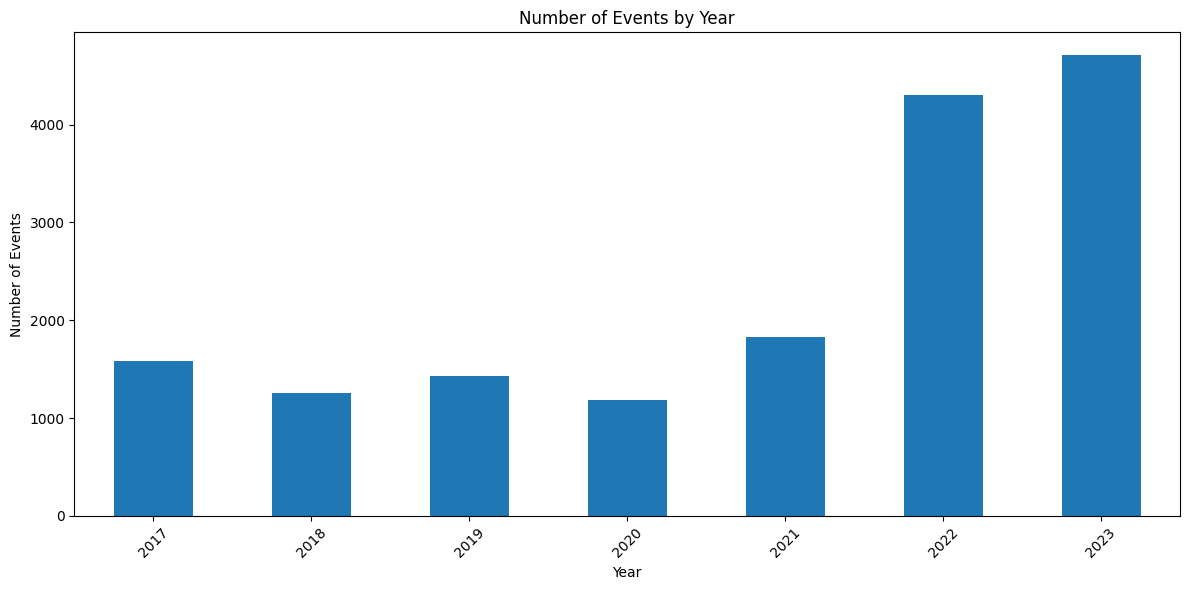

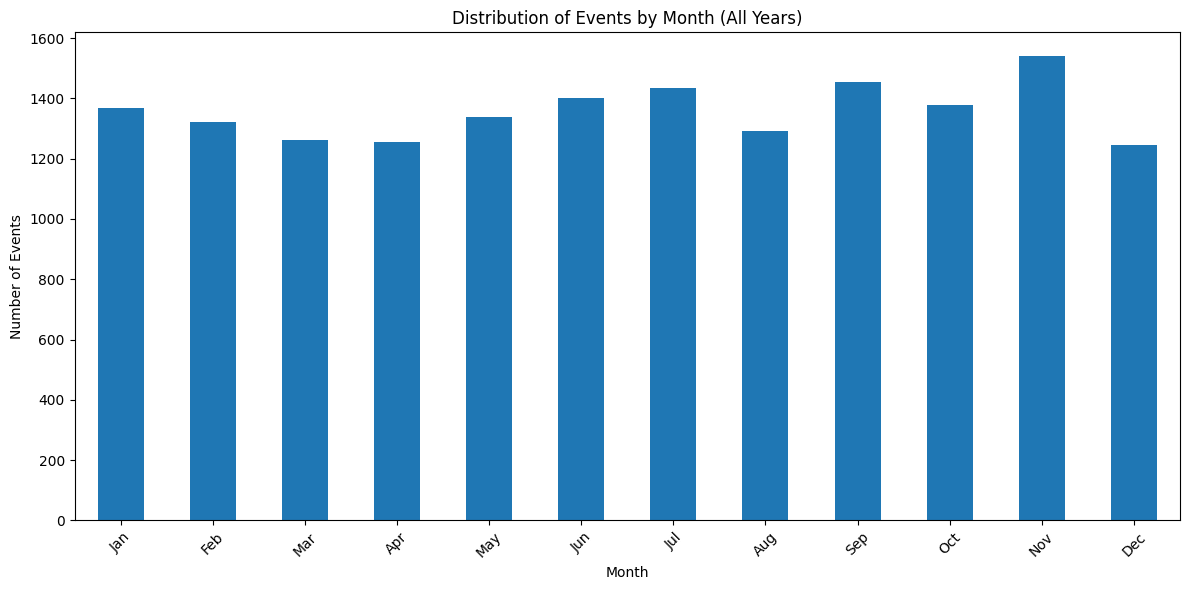

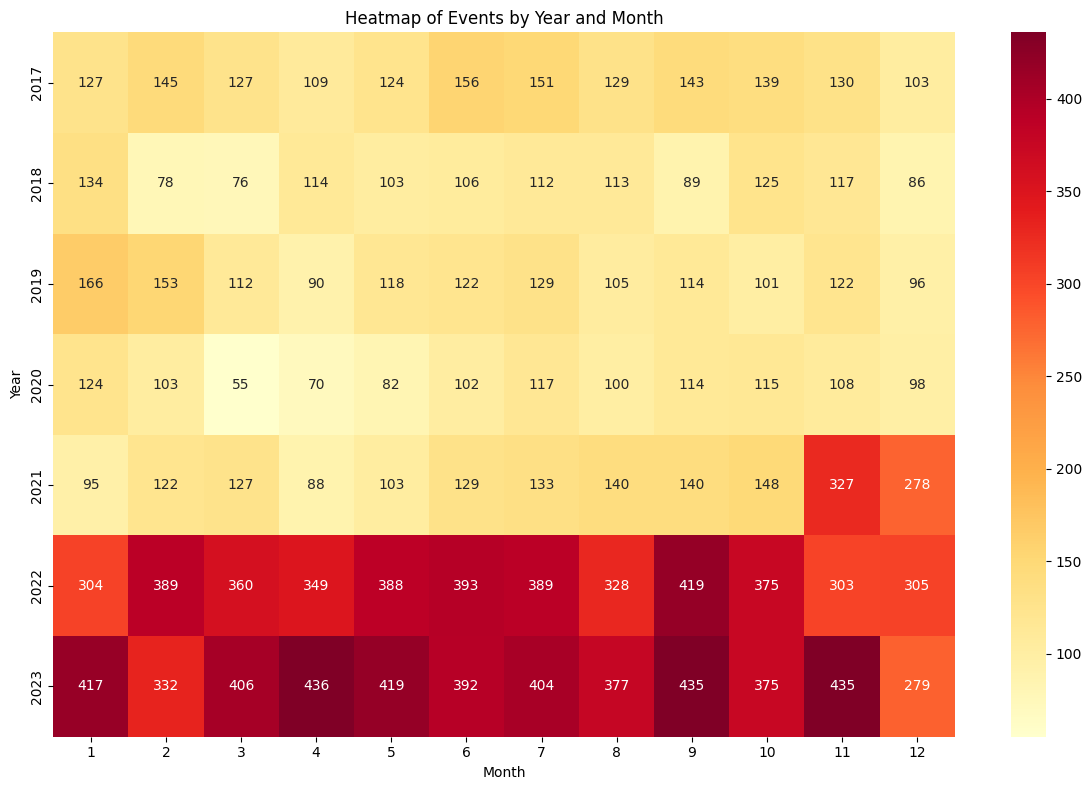

Summary Statistics:
Busiest months overall:
EVENT DATE
1    1367
2    1322
3    1263
4    1256
5    1337
Name: count, dtype: int64
Busiest years:
EVENT DATE
2023    4707
2022    4302
2021    1830
2017    1583
2019    1428
Name: count, dtype: int64
Year-over-year growth (%):
EVENT DATE
2017           NaN
2018    -20.846494
2019     13.966480
2020    -16.806723
2021     54.040404
2022    135.081967
2023      9.414226
Name: count, dtype: float64


In [52]:
# Create yearly trend
yearly_counts = dataset1['EVENT DATE'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')
plt.title('Number of Events by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly pattern across all years
monthly_counts = dataset1['EVENT DATE'].dt.month.value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Distribution of Events by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of events by year and month
dataset1['Year'] = dataset1['EVENT DATE'].dt.year
dataset1['Month'] = dataset1['EVENT DATE'].dt.month
heatmap_data = pd.crosstab(dataset1['Year'], dataset1['Month'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap of Events by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Print some summary statistics
print("\
Summary Statistics:")
print("\
Busiest months overall:")
print(monthly_counts.head())

print("\
Busiest years:")
print(yearly_counts.sort_values(ascending=False).head())

# Calculate year-over-year growth
yoy_growth = yearly_counts.pct_change() * 100
print("\
Year-over-year growth (%):")
print(yoy_growth)

#### Insights
The insights gained from this study are as follows:

- Massive growth of 135.37% from 2021 to 2022

- Consistent growth in recent years

- The number of events has more than tripled from 2017 to 2023

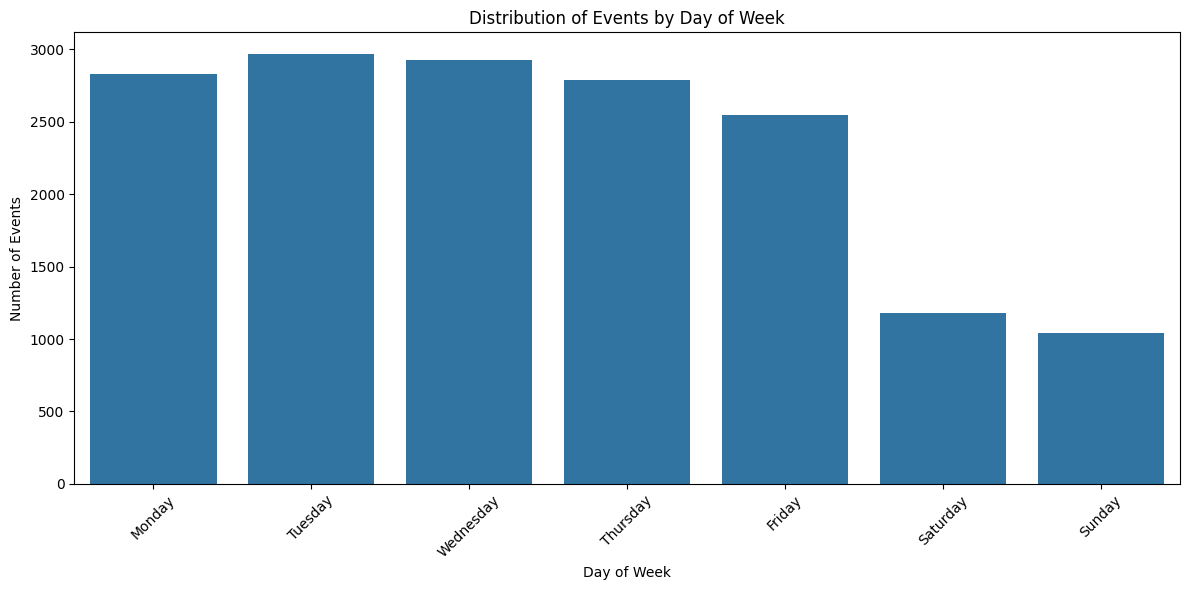

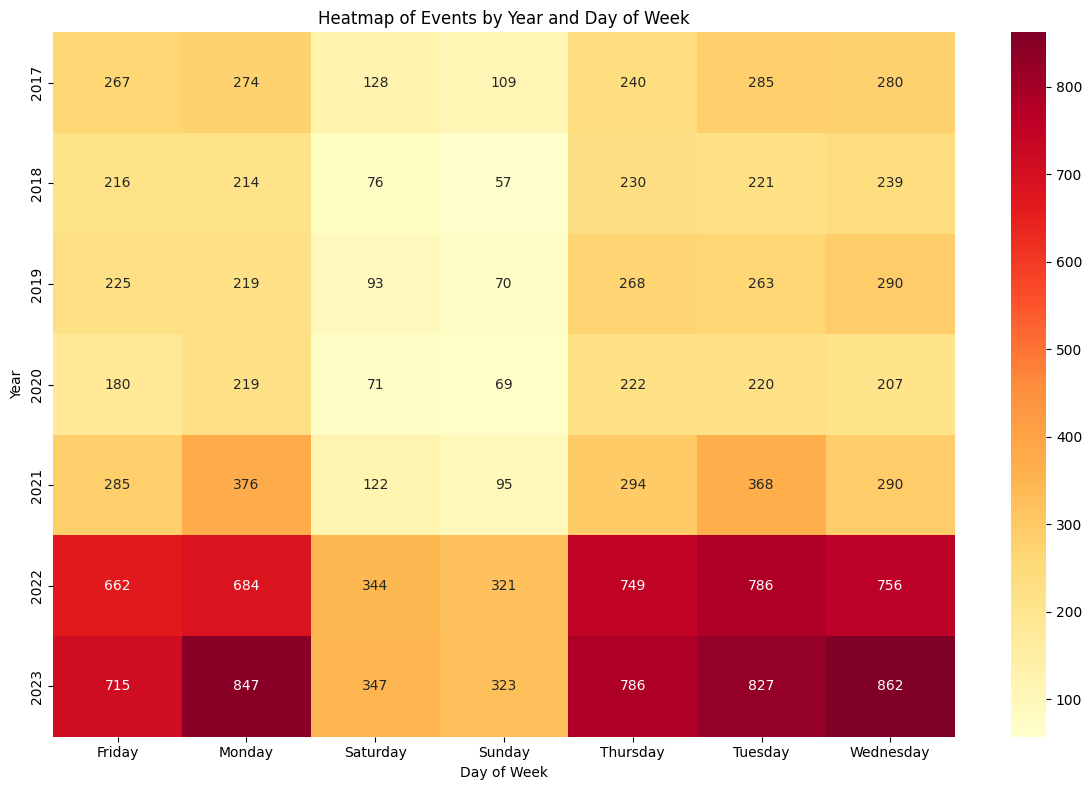

Events by Day of Week:
DayOfWeek
Monday       2833
Tuesday      2970
Wednesday    2924
Thursday     2789
Friday       2550
Saturday     1181
Sunday       1044
Name: count, dtype: int64
Percentage Distribution:
DayOfWeek
Monday       17.39%
Tuesday      18.23%
Wednesday    17.95%
Thursday     17.12%
Friday       15.65%
Saturday      7.25%
Sunday        6.41%
Name: count, dtype: object


In [53]:
# Add day of week analysis
dataset1['DayOfWeek'] = dataset1['EVENT DATE'].dt.day_name()
dataset1['DayOfWeekNum'] = dataset1['EVENT DATE'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create daily pattern plot
plt.figure(figsize=(12, 6))
day_counts = dataset1['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Distribution of Events by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create heatmap of days by year
day_year_heatmap = pd.crosstab(dataset1['Year'], dataset1['DayOfWeek'])
plt.figure(figsize=(12, 8))
sns.heatmap(day_year_heatmap, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap of Events by Year and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Events by Day of Week:")
print(day_counts)

# Calculate percentage distribution
day_percentages = (day_counts / len(dataset1) * 100).round(2)
print("\
Percentage Distribution:")
print(day_percentages.apply(lambda x: f"{x:.2f}%"))

In [54]:
# Create time-based features
dataset1['Year'] = dataset1['EVENT DATE'].dt.year
dataset1['Season'] = pd.cut(dataset1['EVENT DATE'].dt.month, 
                      bins=[0, 3, 6, 9, 12], 
                      labels=['Winter', 'Spring', 'Summer', 'Fall'],
                      include_lowest=True)
dataset1['Month_Name'] = dataset1['EVENT DATE'].dt.strftime('%B')

# Create aggregated views
seasonal_yearly = pd.crosstab(dataset1['Year'], dataset1['Season'])
monthly_yearly = pd.crosstab(dataset1['Year'], dataset1['Month_Name'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_yearly = monthly_yearly.reindex(columns=month_order)

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [56]:
# Create the comprehensive dashboard
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "sunburst", "rowspan": 2}, {"type": "xy"}],
           [None, {"type": "xy"}]],
    column_widths=[0.4, 0.6],
    subplot_titles=("Hierarchical View", "Seasonal Trends Over Time", "Monthly Distribution")
)

# 1. Add Sunburst chart
sunburst_data = px.sunburst(
    dataset1,
    path=['Year', 'Season', 'Month_Name'],
    color='Year',
    color_continuous_scale='Viridis'
).data[0]
fig.add_trace(sunburst_data, row=1, col=1)

# 2. Add Interactive Line chart with buttons
seasons = seasonal_yearly.columns
for season in seasons:
    fig.add_trace(
        go.Scatter(
            x=seasonal_yearly.index,
            y=seasonal_yearly[season],
            name=season,
            mode='lines+markers',
            hovertemplate='Year: %{x}<br>Count: %{y}<br>Season: ' + season
        ),
        row=1, col=2
    )

# 3. Add Monthly Heatmap
fig.add_trace(
    go.Heatmap(
        z=monthly_yearly.values,
        x=monthly_yearly.columns,
        y=monthly_yearly.index,
        colorscale='YlOrRd',
        colorbar=dict(title='Number of Events'),
        hoverongaps=False
    ),
    row=2, col=2
)

# Update layout with interactive features
fig.update_layout(
    height=1000,
    width=1400,
    title_text="Comprehensive Seasonal Analysis Dashboard",
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True] + [True]*len(seasons) + [True]}],
                    label="All Seasons",
                    method="restyle"
                )
            ] + [
                dict(
                    args=[{"visible": [True] + 
                          [True if i == j else False for i in range(len(seasons))] +
                          [True]}],
                    label=season,
                    method="restyle"
                ) for j, season in enumerate(seasons)
            ]),
            direction="down",
            showactive=True,
            x=1.0,
            xanchor="right",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Update axes labels and styling
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_xaxes(title_text="Month", row=2, col=2)
fig.update_yaxes(title_text="Number of Events", row=1, col=2)
fig.update_yaxes(title_text="Year", row=2, col=2)

fig.show()

# Print summary statistics
print("\
Seasonal Distribution Summary:")
seasonal_stats = seasonal_yearly.describe().round(2)
print(seasonal_stats)

print("\
Monthly Distribution Summary:")
monthly_stats = monthly_yearly.mean().round(2)
print(monthly_stats)

Seasonal Distribution Summary:
Season   Winter   Spring   Summer     Fall
count      7.00     7.00     7.00     7.00
mean     564.57   570.43   597.29   595.00
std      373.59   425.37   398.05   339.56
min      282.00   254.00   314.00   319.00
25%      316.00   321.50   339.50   324.50
50%      399.00   330.00   413.00   372.00
75%      742.00   759.50   779.50   868.00
max     1155.00  1247.00  1216.00  1089.00
Monthly Distribution Summary:
Month_Name
January      195.29
February     188.86
March        180.43
April        179.43
May          191.00
June         200.00
July         205.00
August       184.57
September    207.71
October      196.86
November     220.29
December     177.86
dtype: float64


In [60]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from IPython.display import HTML, display

In [61]:
def convert_worker_count(x):
    if pd.isna(x):
        return None
    elif x == '1 to 5':
        return 3
    elif x == '6 to 19':
        return 12.5
    elif x == '20 to 49':
        return 34.5
    elif x == '50 or More':
        return 75
    return None

dataset1['Worker_Count_Numeric'] = dataset1['WORKER COUNT'].apply(convert_worker_count)
dataset1['Month_Year'] = dataset1['EVENT DATE'].dt.to_period('M')

# Create monthly aggregations
monthly_Incidents = dataset1.groupby('Month_Year').size().reset_index()
monthly_Incidents.columns = ['Month_Year', 'Incidents']
monthly_Incidents['Month_Year'] = monthly_Incidents['Month_Year'].astype(str).apply(lambda x: datetime.strptime(x + '-01', '%Y-%m-%d'))

# Regional trends (note the space before REGION in the column name)
regional_trends = dataset1.groupby(['Month_Year', 'REGION']).size().reset_index()
regional_trends.columns = ['Month_Year', 'REGION', 'Incidents']
regional_trends['Month_Year'] = regional_trends['Month_Year'].astype(str).apply(lambda x: datetime.strptime(x + '-01', '%Y-%m-%d'))

# Distributions
regional_dist = dataset1['REGION'].value_counts()
program_dist = dataset1['Program'].value_counts()
worker_dist = dataset1['WORKER COUNT'].value_counts()
sector_dist = dataset1['SECTOR DESCRIPTION'].value_counts()

# Create the main dashboard
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Monthly Incidents Over Time',
        'Regional Distribution',
        'Program Distribution',
        'Worker Count Distribution',
        'Regional Trends',
        'Sector Distribution'
    ),
    specs=[[{"type": "scatter"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "pie"}]],
    vertical_spacing=0.12
)

# 1. Monthly Incidents Timeline
fig.add_trace(
    go.Scatter(x=monthly_Incidents['Month_Year'], y=monthly_Incidents['Incidents'],
               mode='lines+markers', name='Monthly Incidents'),
    row=1, col=1
)

# 2. Regional Distribution (Pie Chart)
fig.add_trace(
    go.Pie(labels=regional_dist.index, values=regional_dist.values,
           name='Regional Distribution'),
    row=1, col=2
)

# 3. Program Distribution
fig.add_trace(
    go.Bar(x=program_dist.index, y=program_dist.values,
           name='Program Distribution'),
    row=2, col=1
)

# 4. Worker Count Distribution
fig.add_trace(
    go.Bar(x=worker_dist.index, y=worker_dist.values,
           name='Worker Count Distribution'),
    row=2, col=2
)

# 5. Regional Trends Over Time
for region in dataset1['REGION'].unique():
    region_data = regional_trends[regional_trends['REGION'] == region]
    fig.add_trace(
        go.Scatter(x=region_data['Month_Year'], y=region_data['Incidents'],
                   mode='lines', name=region),
        row=3, col=1
    )

# 6. Sector Distribution (Pie Chart)
fig.add_trace(
    go.Pie(labels=sector_dist.index[:10], values=sector_dist.values[:10],
           name='Top 10 Sectors'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1500, 
    width=1200, 
    title_text="Comprehensive Health & Safety Incidents Dashboard",
    showlegend=True,
    template='plotly_dark'
)

# Show the dashboard
fig.show()

# Calculate and display key statistics
stats_html = f"""
<h2>Key Statistics</h2>
<style>
.stats-container {{
    background-color: #2d3035;
    padding: 20px;
    border-radius: 10px;
    color: white;
    font-family: Arial, sans-serif;
}}
.stat-item {{
    margin: 10px 0;
    padding: 10px;
    background-color: #383c44;
    border-radius: 5px;
}}
</style>
<div class="stats-container">
    <div class="stat-item">Total Incidents: {len(dataset1)}</div>
    <div class="stat-item">Most Common Region: {dataset1['REGION'].mode()[0]}</div>
    <div class="stat-item">Most Common Program: {dataset1['Program'].mode()[0]}</div>
    <div class="stat-item">Number of Unique Sectors: {dataset1['SECTOR DESCRIPTION'].nunique()}</div>
    <div class="stat-item">Average Monthly Incidents: {round(monthly_Incidents['Incidents'].mean(), 2)}</div>
    <div class="stat-item">Peak Month: {monthly_Incidents.loc[monthly_Incidents['Incidents'].idxmax(), 'Month_Year'].strftime('%B %Y')}</div>
</div>
"""

display(HTML(stats_html))

# Print summary of key findings
print("\
Key Findings:")
print("1. Total number of Inspection:", len(dataset1))
print("2. Most common region:", dataset1['REGION'].mode()[0])
print("3. Most common program:", dataset1['Program'].mode()[0])
print("4. Number of unique sectors:", dataset1['SECTOR DESCRIPTION'].nunique())
print("5. Average monthly Incidents:", round(monthly_Incidents['Incidents'].mean(), 2))
print("6. Peak month for Incidents:", monthly_Incidents.loc[monthly_Incidents['Incidents'].idxmax(), 'Month_Year'].strftime('%B %Y'))

Key Findings:
1. Total number of Inspection: 16291
2. Most common region: Central East
3. Most common program: Industrial Health & Safety Program
4. Number of unique sectors: 89
5. Average monthly Incidents: 193.94
6. Peak month for Incidents: April 2023


In [71]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime


# Create a single figure with multiple subplots for distribution analysis
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        'Inspections Over Time (Monthly)',
        'Regional Distribution',
        'Program Type Distribution',
        'Worker Count Distribution',
        'Top 10 Municipalities',
        'Top 10 Occupations',
        'Top 10 Sectors',
        'Monthly Trends by Region'
    ),
    specs=[
        [{"type": "scatter"}, {"type": "pie"}],
        [{"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "scatter"}]
    ],
    vertical_spacing=0.08,
    horizontal_spacing=0.1
)

# 1. Time Series of Inspections
monthly_data = dataset1.groupby(dataset1['EVENT DATE'].dt.to_period('M')).size().reset_index()
monthly_data.columns = ['Date', 'Count']
monthly_data['Date'] = monthly_data['Date'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

fig.add_trace(
    go.Scatter(
        x=monthly_data['Date'],
        y=monthly_data['Count'],
        mode='lines+markers',
        name='Monthly Inspections'
    ),
    row=1, col=1
)

# 2. Regional Distribution
region_data = dataset1['REGION'].value_counts()
fig.add_trace(
    go.Pie(
        labels=region_data.index,
        values=region_data.values,
        name='Regions'
    ),
    row=1, col=2
)

# 3. Program Distribution
program_data = dataset1['Program'].value_counts()
fig.add_trace(
    go.Bar(
        x=program_data.index,
        y=program_data.values,
        name='Programs'
    ),
    row=2, col=1
)

# 4. Worker Count Distribution
worker_data = dataset1['WORKER COUNT'].value_counts()
fig.add_trace(
    go.Bar(
        x=worker_data.index,
        y=worker_data.values,
        name='Worker Count'
    ),
    row=2, col=2
)

# 5. Top 10 Municipalities
municipality_data = dataset1['MUNICIPALITY'].value_counts().head(10)
fig.add_trace(
    go.Bar(
        x=municipality_data.index,
        y=municipality_data.values,
        name='Municipalities'
    ),
    row=3, col=1
)

# 6. Top 10 Occupations
occupation_data = dataset1['OCCUPATION DESCRIPTION'].value_counts().head(10)
fig.add_trace(
    go.Bar(
        x=occupation_data.index,
        y=occupation_data.values,
        name='Occupations'
    ),
    row=3, col=2
)

# 7. Top 10 Sectors
sector_data = dataset1['SECTOR DESCRIPTION'].value_counts().head(10)
fig.add_trace(
    go.Bar(
        x=sector_data.index,
        y=sector_data.values,
        name='Sectors'
    ),
    row=4, col=1
)

# 8. Monthly Trends by Region
for region in dataset1['REGION'].unique():
    region_monthly = dataset1[dataset1['REGION'] == region].groupby(dataset1['EVENT DATE'].dt.to_period('M')).size().reset_index()
    region_monthly.columns = ['Date', 'Count']
    region_monthly['Date'] = region_monthly['Date'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))
    
    fig.add_trace(
        go.Scatter(
            x=region_monthly['Date'],
            y=region_monthly['Count'],
            name=region,
            mode='lines'
        ),
        row=4, col=2
    )

# Update layout
fig.update_layout(
    height=2000,
    width=1500,
    title_text="Comprehensive Distribution Analysis Dashboard",
    showlegend=True,
    template='plotly_dark'
)

# Update axes labels and formatting
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Number of Inspections", row=1, col=1)

fig.update_xaxes(title_text="Program Type", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.update_xaxes(title_text="Worker Count Range", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=2)

fig.update_xaxes(title_text="Municipality", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=1)

fig.update_xaxes(title_text="Occupation", row=3, col=2)
fig.update_yaxes(title_text="Count", row=3, col=2)

fig.update_xaxes(title_text="Sector", row=4, col=1)
fig.update_yaxes(title_text="Count", row=4, col=1)

fig.update_xaxes(title_text="Date", row=4, col=2)
fig.update_yaxes(title_text="Count", row=4, col=2)

# Show the figure
fig.show()

# Calculate and display summary statistics
print("\
Summary Statistics:")
print("\
1. Total Inspections:", len(dataset1))
print("\
2. Regional Distribution:")
print(region_data.head())
print("\
3. Program Distribution:")
print(program_data.head())
print("\
4. Top 5 Municipalities:")
print(municipality_data.head())
print("\
5. Top 5 Occupations:")
print(occupation_data.head())
print("\
6. Top 5 Sectors:")
print(sector_data.head())
print("\
7. Worker Count Distribution:")
print(worker_data)
print("\
8. Monthly Statistics:")
print("Average monthly Inspections:", round(monthly_data['Count'].mean(), 2))
print("Maximum monthly Inspections:", monthly_data['Count'].max())
print("Minimum monthly Inspections:", monthly_data['Count'].min())

Summary Statistics:
1. Total Inspections: 16291
2. Regional Distribution:
REGION
Central East     4684
Western          3327
Central West     3252
South Western    2512
Northern         1363
Name: count, dtype: int64
3. Program Distribution:
Program
Industrial Health & Safety Program      11279
Construction Health & Safety Program     2520
Health Care Health & Safety Program      2147
Mining Health & Safety Program            345
Name: count, dtype: int64
4. Top 5 Municipalities:
MUNICIPALITY
Toronto        2001
Mississauga     862
Brampton        636
Scarborough     409
North York      403
Name: count, dtype: int64
5. Top 5 Occupations:
OCCUPATION DESCRIPTION
Elementary and Secondary Schools                      1734
Residential Building Construction                     1040
General (except Paediatric) Hospitals                  855
Commercial and Institutional Building Construction     475
Nursing Care Facilities                                457
Name: count, dtype: int64
6. Top 5 S

In [72]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create worker count numeric values
def convert_worker_count(x):
    if pd.isna(x):
        return None
    elif x == '1 to 5':
        return 3
    elif x == '6 to 19':
        return 12.5
    elif x == '20 to 49':
        return 34.5
    elif x == '50 or More':
        return 75
    return None

dataset1['Worker_Count_Numeric'] = dataset1['WORKER COUNT'].map(convert_worker_count)

# Create the main figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Yearly Incident Trends by Region',
        'Sector-wise Distribution',
        'Worker Count Distribution',
        'Monthly Incident Patterns'
    ),
    specs=[
        [{"type": "bar"}, {"type": "pie"}],
        [{"type": "bar"}, {"type": "scatter"}]
    ]
)

# 1. Yearly Incident Trends by Region
yearly_region = dataset1.groupby(['Year', 'REGION']).size().reset_index(name='Count')
for region in dataset1['REGION'].unique():
    region_data = yearly_region[yearly_region['REGION'] == region]
    fig.add_trace(
        go.Bar(
            name=region,
            x=region_data['Year'],
            y=region_data['Count'],
            text=region_data['Count'],
            textposition='auto',
        ),
        row=1, col=1
    )

# 2. Sector Distribution
sector_data = dataset1['SECTOR DESCRIPTION'].value_counts().head(10)
fig.add_trace(
    go.Pie(
        labels=sector_data.index,
        values=sector_data.values,
        hole=0.3,
        textinfo='label+percent'
    ),
    row=1, col=2
)

# 3. Worker Count Distribution
worker_data = dataset1['WORKER COUNT'].value_counts()
fig.add_trace(
    go.Bar(
        x=worker_data.index,
        y=worker_data.values,
        text=worker_data.values,
        textposition='auto',
        name='Worker Count'
    ),
    row=2, col=1
)

# 4. Monthly Incident Patterns
monthly_data = dataset1.groupby(['Year', 'Month']).size().reset_index(name='Count')
for year in dataset1['Year'].unique():
    year_data = monthly_data[monthly_data['Year'] == year]
    fig.add_trace(
        go.Scatter(
            x=year_data['Month'],
            y=year_data['Count'],
            mode='lines+markers',
            name=f'Year {year}'
        ),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    height=1000,
    width=1400,
    title_text="Interactive Health & Safety Incident Analysis Dashboard",
    showlegend=True,
    template='plotly_dark',
    barmode='group'
)

# Update axes labels
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_yaxes(title_text="Number of Inspections", row=1, col=1)

fig.update_xaxes(title_text="Worker Count Category", row=2, col=1)
fig.update_yaxes(title_text="Number of Inspections", row=2, col=1)

fig.update_xaxes(title_text="Month", row=2, col=2)
fig.update_yaxes(title_text="Number of Inspections", row=2, col=2)

# Show the figure
fig.show()

# Calculate and print key business insights
print("\
Key Business Insights:")

# 1. Regional Analysis
print("\
1. Regional Risk Assessment:")
regional_trends = dataset1.groupby('REGION').agg({
    'EVENT DATE': 'count',
    'Worker_Count_Numeric': 'mean'
}).round(2)
print(regional_trends)

# 2. Sector Analysis
print("\
2. High-Risk Sectors (Top 5):")
sector_risk = dataset1.groupby('SECTOR DESCRIPTION').size().sort_values(ascending=False).head()
print(sector_risk)

# 3. Worker Count Impact
print("\
3. Incident Distribution by Facility Size:")
worker_impact = dataset1['WORKER COUNT'].value_counts()
print(worker_impact)

# 4. Yearly Trends
print("\
4. Year-over-Year Trend:")
yearly_trend = dataset1.groupby('Year').size()
print(yearly_trend)

# 5. Calculate growth rates
print("\
5. Year-over-Year Growth Rate:")
yoy_growth = yearly_trend.pct_change() * 100
print(yoy_growth.round(2), "% change")

Key Business Insights:
1. Regional Risk Assessment:
               EVENT DATE  Worker_Count_Numeric
REGION                                         
Central East         4684                 60.47
Central West         3252                 61.04
Eastern              1153                 59.21
Northern             1363                 60.84
South Western        2512                 61.01
Western              3327                 60.44
2. High-Risk Sectors (Top 5):
SECTOR DESCRIPTION
Education                   2132
Retail                      1149
Hospitals                    979
Wood & Metal Fabrication     850
Automotive                   714
dtype: int64
3. Incident Distribution by Facility Size:
WORKER COUNT
50 or More    10660
20 to 49       2376
6 to 19        1902
Name: count, dtype: int64
4. Year-over-Year Trend:
Year
2017    1583
2018    1253
2019    1428
2020    1188
2021    1830
2022    4302
2023    4707
dtype: int64
5. Year-over-Year Growth Rate:
Year
2017       NaN
2018    -2

In [73]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


dataset1['Year'] = dataset1['EVENT DATE'].dt.year
dataset1['Month'] = dataset1['EVENT DATE'].dt.month
dataset1['Day'] = dataset1['EVENT DATE'].dt.day
dataset1['DayOfWeek'] = dataset1['EVENT DATE'].dt.day_name()

# Create comprehensive analysis
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Inspections by Day of Week',
        'Monthly Distribution',
        'Regional Distribution',
        'Top 10 Municipalities',
        'Top Industries',
        'Seasonal Distribution'
    )
)

# 1. Day of Week Analysis
dow_data = dataset1['DayOfWeek'].value_counts().reset_index()
fig.add_trace(
    go.Bar(x=dow_data['DayOfWeek'], y=dow_data['count'], name='Day of Week'),
    row=1, col=1
)

# 2. Monthly Analysis
monthly_data = dataset1['Month'].value_counts().sort_index().reset_index()
fig.add_trace(
    go.Bar(x=monthly_data['Month'], y=monthly_data['count'], name='Monthly'),
    row=1, col=2
)

# 3. Regional Analysis
regional_data = dataset1['REGION'].value_counts().reset_index()
fig.add_trace(
    go.Bar(x=regional_data['REGION'], y=regional_data['count'], name='Regional'),
    row=2, col=1
)

# 4. Municipal Analysis
municipal_data = dataset1['MUNICIPALITY'].value_counts().head(10).reset_index()
fig.add_trace(
    go.Bar(x=municipal_data['MUNICIPALITY'], y=municipal_data['count'], name='Municipal'),
    row=2, col=2
)

# 5. Industry Analysis
industry_data = dataset1['SECTOR DESCRIPTION'].value_counts().head(10).reset_index()
fig.add_trace(
    go.Bar(x=industry_data['SECTOR DESCRIPTION'], y=industry_data['count'], name='Industry'),
    row=3, col=1
)

# 6. Seasonal Analysis
dataset1['Season'] = dataset1['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
seasonal_data = dataset1['Season'].value_counts().reset_index()
fig.add_trace(
    go.Bar(x=seasonal_data['Season'], y=seasonal_data['count'], name='Seasonal'),
    row=3, col=2
)

# Update layout
fig.update_layout(height=1200, width=1400, showlegend=False,
                 title_text="Comprehensive Inspection Planning Dashboard")

# Show the figure
fig.show()

# Print detailed insights
print("\
Optimal Inspection Planning Insights:")

# 1. Day of Week Analysis
best_day = dow_data.iloc[dow_data['count'].argmax()]
print("\
1. Best Day for Inspection:")
print(f"Most Inspections occur on {best_day['DayOfWeek']} with {best_day['count']} Inspections")

# 2. Monthly Analysis
best_month = monthly_data.iloc[monthly_data['count'].argmax()]
print("\
2. Best Month for Inspection:")
print(f"Month {best_month['Month']} has the highest Inspections with {best_month['count']} cases")

# 3. Regional Focus
best_region = regional_data.iloc[0]
print("\
3. Priority Region:")
print(f"Region {best_region['REGION']} has the highest Inspections with {best_region['count']} cases")

# 4. Municipal Focus
best_municipality = municipal_data.iloc[0]
print("\
4. Priority Municipality:")
print(f"{best_municipality['MUNICIPALITY']} has the highest Inspections with {best_municipality['count']} cases")

# 5. Industry Focus
best_industry = industry_data.iloc[0]
print("\
5. Priority Industry:")
print(f"{best_industry['SECTOR DESCRIPTION']} has the highest Inspections with {best_industry['count']} cases")

# 6. Seasonal Patterns
best_season = seasonal_data.iloc[seasonal_data['count'].argmax()]
print("\
6. Best Season for Inspection:")
print(f"{best_season['Season']} has the highest Inspections with {best_season['count']} cases")

# Comprehensive Recommendation
print("\
Comprehensive Inspection Recommendation:")
print(f"Based on the data analysis, inspections should prioritize:")
print(f"- Day: {best_day['DayOfWeek']}")
print(f"- Month: {best_month['Month']} (during {best_season['Season']})")
print(f"- Region: {best_region['REGION']}")
print(f"- Municipality: {best_municipality['MUNICIPALITY']}")
print(f"- Industry Sector: {best_industry['SECTOR DESCRIPTION']}")

Optimal Inspection Planning Insights:
1. Best Day for Inspection:
Most Inspections occur on Tuesday with 2970 Inspections
2. Best Month for Inspection:
Month 11 has the highest Inspections with 1542 cases
3. Priority Region:
Region Central East has the highest Inspections with 4684 cases
4. Priority Municipality:
Toronto has the highest Inspections with 2001 cases
5. Priority Industry:
Education has the highest Inspections with 2132 cases
6. Best Season for Inspection:
Fall has the highest Inspections with 4374 cases
Comprehensive Inspection Recommendation:
Based on the data analysis, inspections should prioritize:
- Day: Tuesday
- Month: 11 (during Fall)
- Region: Central East
- Municipality: Toronto
- Industry Sector: Education


In [66]:
dataset1.columns

Index(['EVENT DATE', 'Program', 'MUNICIPALITY', 'REGION',
       'PRIMARY OCCUPATION CODE', 'OCCUPATION DESCRIPTION', 'SECTOR CODE',
       'SECTOR DESCRIPTION', 'WORKER COUNT', 'Month', 'Year', 'Day_of_Week',
       'Quarter', 'YearMonth', 'DayOfWeek', 'DayOfWeekNum', 'Season',
       'Month_Name', 'Worker_Count_Numeric', 'Month_Year'],
      dtype='object')

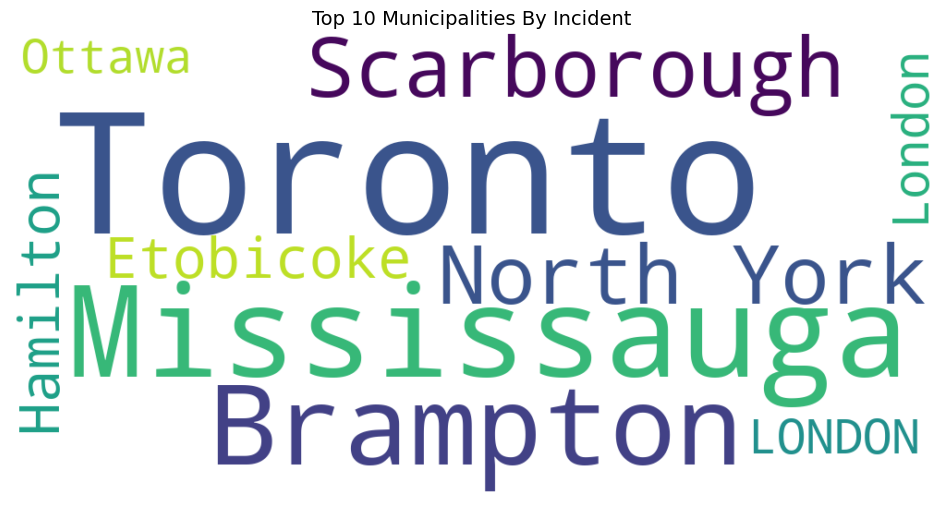

,MUNICIPALITY,Incident_Count
0,Toronto,1688
1,Mississauga,865
2,Brampton,638
3,Scarborough,411
4,North York,404
5,Etobicoke,391
6,Hamilton,372
7,London,302
8,LONDON,285
9,Ottawa,276


In [72]:
from wordcloud import WordCloud
# Generate Municipality Frequency Data
municipality_freq = df1['MUNICIPALITY'].value_counts().head(10).to_dict()  # Get top 10 municipalities

# Generate Word Cloud using Municipality Frequencies
wordcloud_municipality = WordCloud(width=1000, height=500, background_color="white", colormap="viridis",
                                   normalize_plurals=True).generate_from_frequencies(municipality_freq)

# Plot Word Cloud with Frequencies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_municipality, interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 Municipalities By Incident", fontsize=14)
plt.show()

# Display Municipality Frequencies in a Table
municipality_freq_df = pd.DataFrame(list(municipality_freq.items()), columns=['MUNICIPALITY', 'Incident_Count'])
municipality_freq_df.head(10)